In [18]:
#مدیریت هشدارها (Warnings)
import warnings 
warnings.filterwarnings('ignore')
#کتابخانه‌های اصلی داده و محاسبات
import pandas as pd
import numpy as np
#کتابخانه‌های مصورسازی داده
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#تقسیم داده و جستجوی پارامتر
from sklearn.model_selection import train_test_split, GridSearchCV
#مدل های یادگیری ماشین
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [20]:
#متریک ها و ارزیابی مدل
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

In [21]:
#تنظیم نمایش داده‌ها در pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [22]:
#بارگذاری مجموعه داده ها و پیش نمایش در pandas
data = pd.read_csv("Loan_Modelling.csv")

In [23]:
#نمایش شکل یا ابعاد داده
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [24]:
#گرفتن نمونه‌ی تصادفی از سطرها
data.sample(10, random_state=2)

#data.head(10) غیر تصادفی

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
3566  3567   57          33      80    92064       2 2.80000          1   
4252  4253   54          29      81    91107       1 0.10000          3   
1918  1919   39           9     118    93555       2 6.00000          3   
4111  4112   43          17      21    95351       3 1.50000          1   
1471  1472   52          26     180    94305       1 1.00000          1   
929    930   55          30      22    92121       1 1.50000          2   
1916  1917   57          32      64    95138       3 1.60000          3   
3995  3996   53          28      34    92697       2 0.60000          3   
1130  1131   58          32     191    94402       1 2.90000          1   
1723  1724   39          15      55    95821       1 1.50000          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
3566         0              0                   0           0       1   
4252         0              0                   0           0       0   
1918       246              1                   0           1       1   
4111         0              0                   0           0       0   
1471         0              0                   0           0       1   
929         91              0                   0           0       0   
1916         0              0                   0           0       1   
3995         0              0                   0           0       1   
1130         0              0                   0           0       0   
1723         0              0                   0           0       1   

      CreditCard  
3566           1  
4252           0  
1918           1  
4111           0  
1471           1  
929            1  
1916           0  
3995           1  
1130           0  
1723           0

In [25]:
#حذف ستون ID (بی‌اهمیت یا شناسه‌ی تکراری)
data.drop('ID', axis=1, inplace=True, errors='ignore')

In [26]:
# بازنشانی ایندکس
data.reset_index(drop=True, inplace=True)

In [27]:
#بازبینی مجدد داده ها
data.sample(5, random_state=2)

Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
3566   57          33      80    92064       2 2.80000          1         0   
4252   54          29      81    91107       1 0.10000          3         0   
1918   39           9     118    93555       2 6.00000          3       246   
4111   43          17      21    95351       3 1.50000          1         0   
1471   52          26     180    94305       1 1.00000          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
3566              0                   0           0       1           1  
4252              0                   0           0       0           0  
1918              1                   0           1       1           1  
4111              0                   0           0       0           0  
1471              0                   0           0       1           1

In [28]:
#بررسی فیچر و ساختار ستون ها
print(data.columns.tolist())

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


In [29]:
#بررسی انواع داده و تعداد non-null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [30]:
#بررسی مقادیر گم‌شده (Missing Values)
data.isnull().sum()
#data.isnull().sum()[data.isnull().sum() > 0] فقط نمایش ستون های دارای null

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [31]:
#چک کردن تکراری ها
data.duplicated().sum()
data.loc[data.duplicated()]

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

In [32]:
#خلاصه آماری داده‌ها
data.describe(include="all").T
#برای ستون‌های غیرعددی (مثل categorical): تعداد مقادیر یونیک، فراوان‌ترین مقدار (top)، و تعداد تکرار اون (freq). .T یعنی Transpose

count        mean        std         min         25%  \
Age                5000.00000    45.33840   11.46317    23.00000    35.00000   
Experience         5000.00000    20.10460   11.46795    -3.00000    10.00000   
Income             5000.00000    73.77420   46.03373     8.00000    39.00000   
ZIPCode            5000.00000 93169.25700 1759.45509 90005.00000 91911.00000   
Family             5000.00000     2.39640    1.14766     1.00000     1.00000   
CCAvg              5000.00000     1.93794    1.74766     0.00000     0.70000   
Education          5000.00000     1.88100    0.83987     1.00000     1.00000   
Mortgage           5000.00000    56.49880  101.71380     0.00000     0.00000   
Personal_Loan      5000.00000     0.09600    0.29462     0.00000     0.00000   
Securities_Account 5000.00000     0.10440    0.30581     0.00000     0.00000   
CD_Account         5000.00000     0.06040    0.23825     0.00000     0.00000   
Online             5000.00000     0.59680    0.49059     0.00000     0.00000   
CreditCard         5000.00000     0.29400    0.45564     0.00000     0.00000   

                           50%         75%         max  
Age                   45.00000    55.00000    67.00000  
Experience            20.00000    30.00000    43.00000  
Income                64.00000    98.00000   224.00000  
ZIPCode            93437.00000 94608.00000 96651.00000  
Family                 2.00000     3.00000     4.00000  
CCAvg                  1.50000     2.50000    10.00000  
Education              2.00000     3.00000     3.00000  
Mortgage               0.00000   101.00000   635.00000  
Personal_Loan          0.00000     0.00000     1.00000  
Securities_Account     0.00000     0.00000     1.00000  
CD_Account             0.00000     0.00000     1.00000  
Online                 1.00000     1.00000     1.00000  
CreditCard             0.00000     1.00000     1.00000

In [33]:
#ایجاد توابع مهم برای EDA
#برچسب گذاری تابع بر اساس نمودار میله ای
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+2, 6))
    else:
        plt.figure(figsize=(n+2, 6))
    plt.xticks(rotation=90, fontsize=15)
    #رسم تعداد (count) برای هر سطحِ feature
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )


    for p in ax.patches:
        if perc==True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  #درصد هر کلاس از آن دسته
        else:
            label = p.get_height()   #تعداد هر سطح از دسته

    x = p.get_x() + p.get_width() / 2   #مرکز عرضی ستون
    y = p.get_height()                  #ارتفاع ستون
    ax.annotate(
        label,
        (x, y),
        ha='center',    #horizontal alignment
        va='center',    #vertical alignment(va)
        size=12,
        xytext=(0, 5),
        textcoords='offset points',
    )
    plt.show()

In [34]:
# تابع برای رسم نمودار میله‌ای انباشته
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts.index[-1]

    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by='sorter', ascending=False)
    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by='sorter', ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count+5, 6))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [35]:
#نمایش توزیع و وجود outlier ها
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2,                                       # تعداد ردیف های شبکه زیر نمودار grid=2
    sharex=True,                                   # محور x بین همه زیرنمودارها مشترک خواهد بود
    gridspec_kw={"height_ratios": (0.25, 0.75)},   #نسبت ارتفاع دو subplot
    figsize=figsize,
    )                # ایجاد دو subplot

    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box2,
        showmeans=True,
        color='violet'
    )       # نمودار جعبه‌ای ایجاد می‌شود و یک مثلث مقدار میانگین ستون را نشان می‌دهد

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins 
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,
    )   #ایجاد هیستوگرام

    ax_hist2.axvline(
        data[feature].mean(),
        color='green',
        linestyle='--'
    )  
    ax_hist2.axvline(
        data[feature].median(), 
        color="black",
        linestyle="-"
    )    #اضافه کردن میانگین و میانه به هیستوگرام

    ### تابعی برای رسم توزیع‌ها بر اساس هدف
    ###بررسی رابطه یک متغیر پیش‌بین با هدف
    def distribution_plot_wrt_target(data, predictor, target):
        fig, axs = plt.subplots(2, 2, figsize(12, 10))
        target_uniq=data[target].unique()

        #هیستوگرام برای کلاس اول تارگت
        axs[0,0].set_title("Distribution of" + predictor + "for target=" + str(target_uniq[0]))
        
        sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

       #هیستوگرام برای کلاس دوم تارگت
        axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
        
        sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

        #مقایسه‌ی مقدار predictor در دو کلاس target
        axs[1, 0].set_title("Boxplot w.r.t target")
        sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

        #Boxplot بدون Outlier
        axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
        sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

    #تابعی برای نمایش نقشه ماتریس همبستگی
    #بررسی رابطه همه متغیرها با هم
    def correlation_heatmap(data):
        plt.figure(figsize=(15, 7))
        plt.title('Correlation Heat Map', y=1.05, size=19)
        sns.heatmap(data.corr(), cmap='Spectral', annot=True, fmt='.2f')

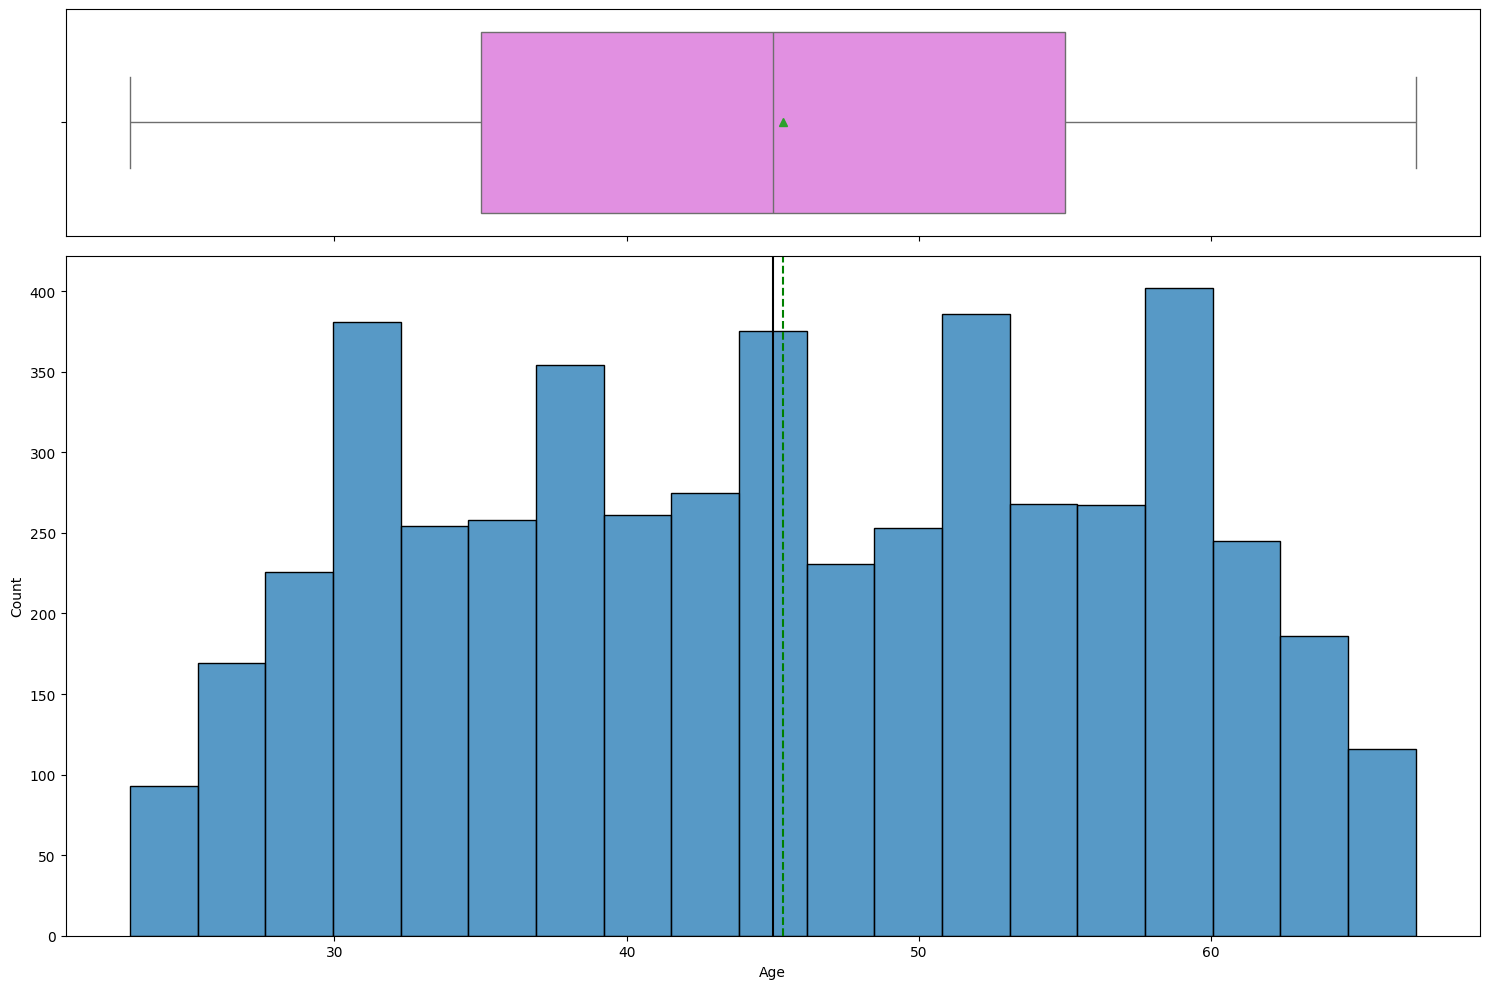

In [36]:
#تحلیل تک متغیره با ستون سن
histogram_boxplot(data, "Age")

In [37]:
#توزیع ستون سن نرمال با چولگی ناچیز به راست است

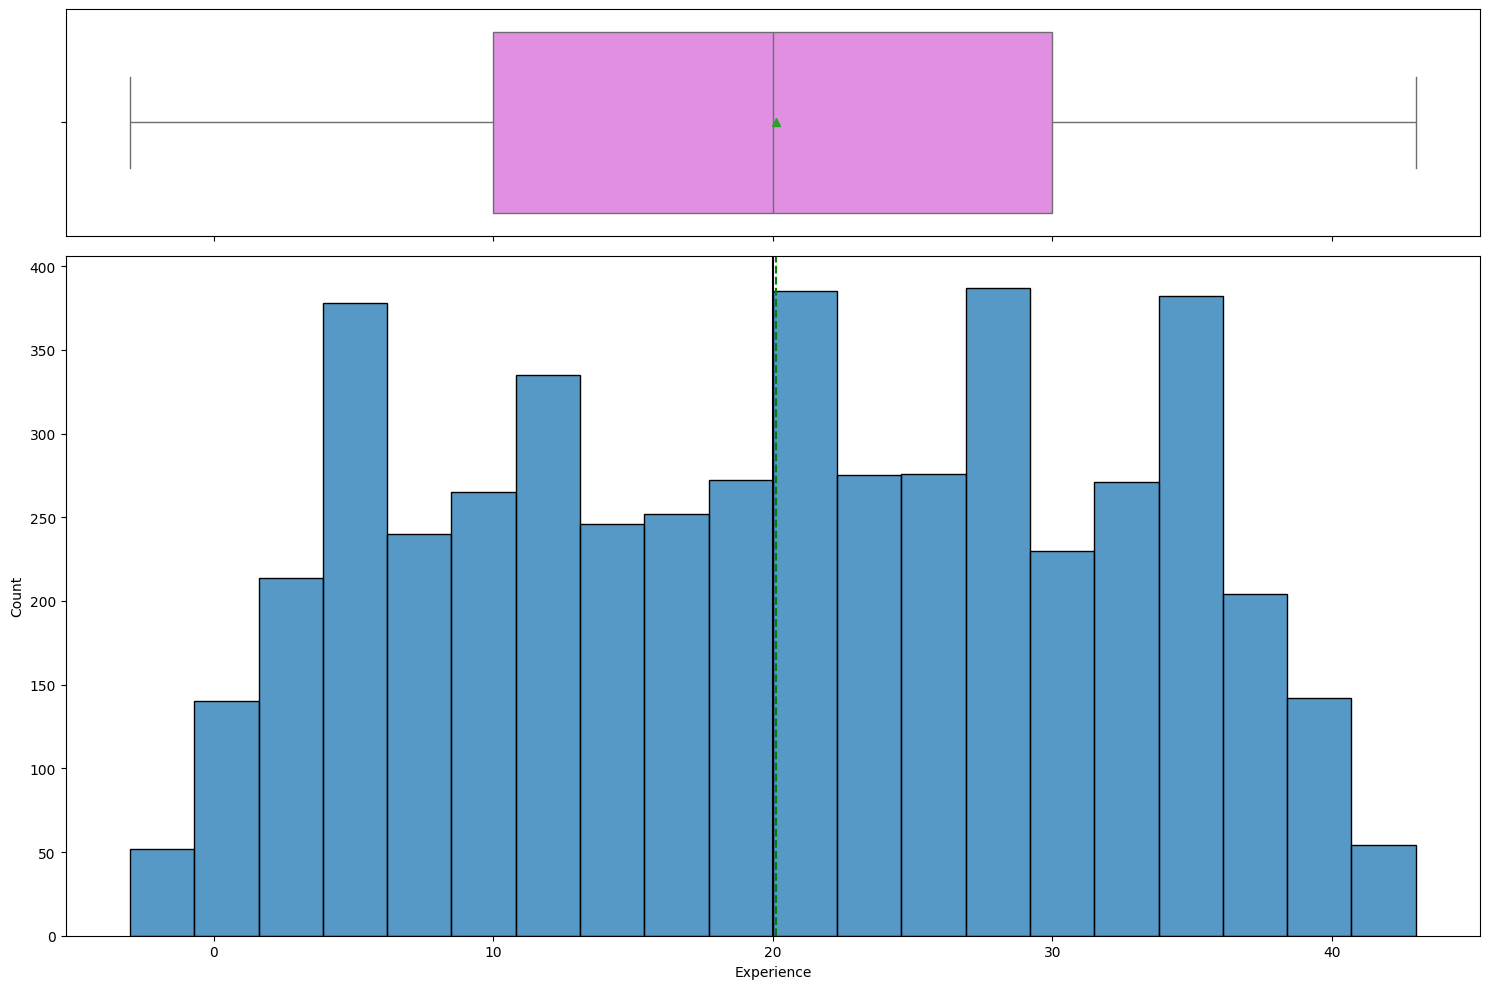

In [38]:
#ستون تجربه
histogram_boxplot(data, "Experience")

In [39]:
#توزیع ستون تجربه نرمال با چولگی ناچیز به راست است.

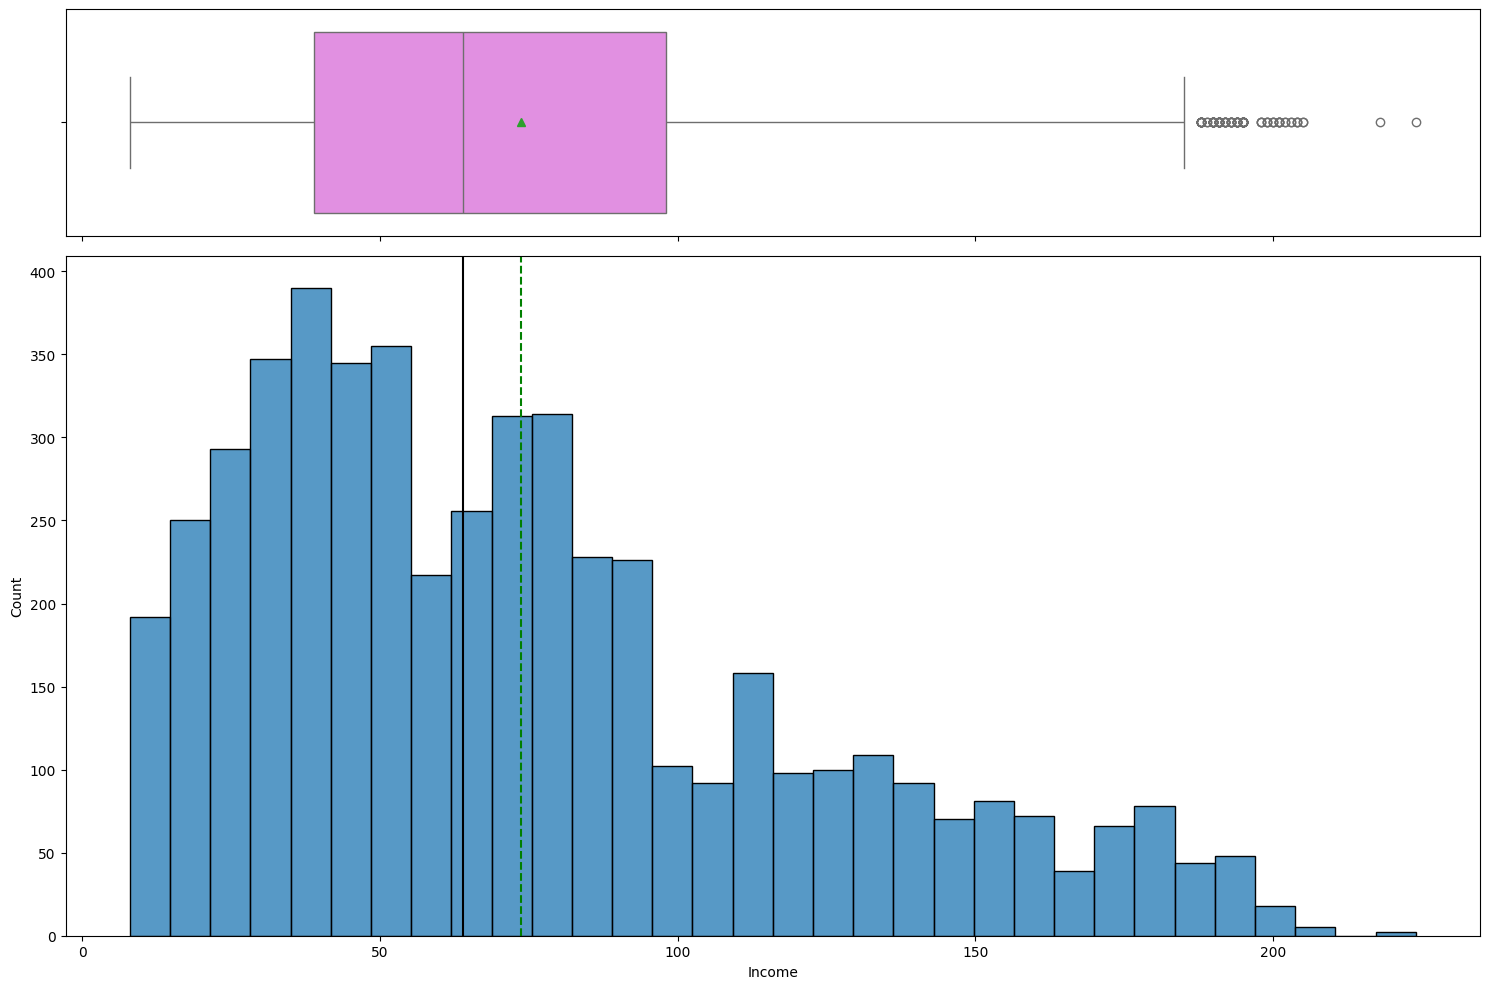

In [40]:
#ستون درآمد
histogram_boxplot(data, "Income")

In [41]:
###توزیع درآمد به راست چولگی دارد
#این بدان معناست که ما تعداد کمی مشتری داریم که درآمدی بیش از میانگین درآمد ۹۸ هزار دلار آمریکا دارند
#ما در این ستون‌ها داده‌های پرت مشاهده می‌کنیم که باید بررسی یا اصلاح شوند

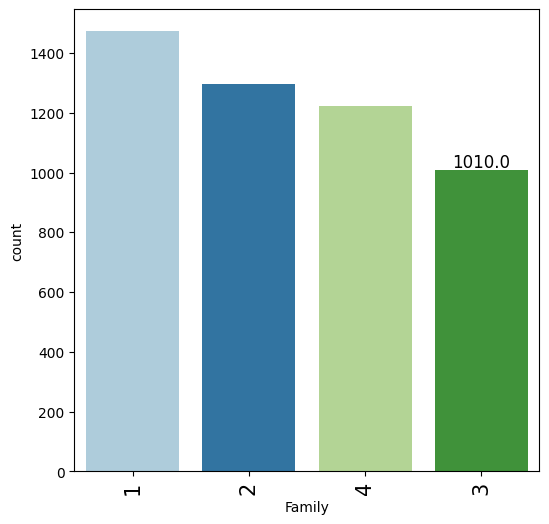

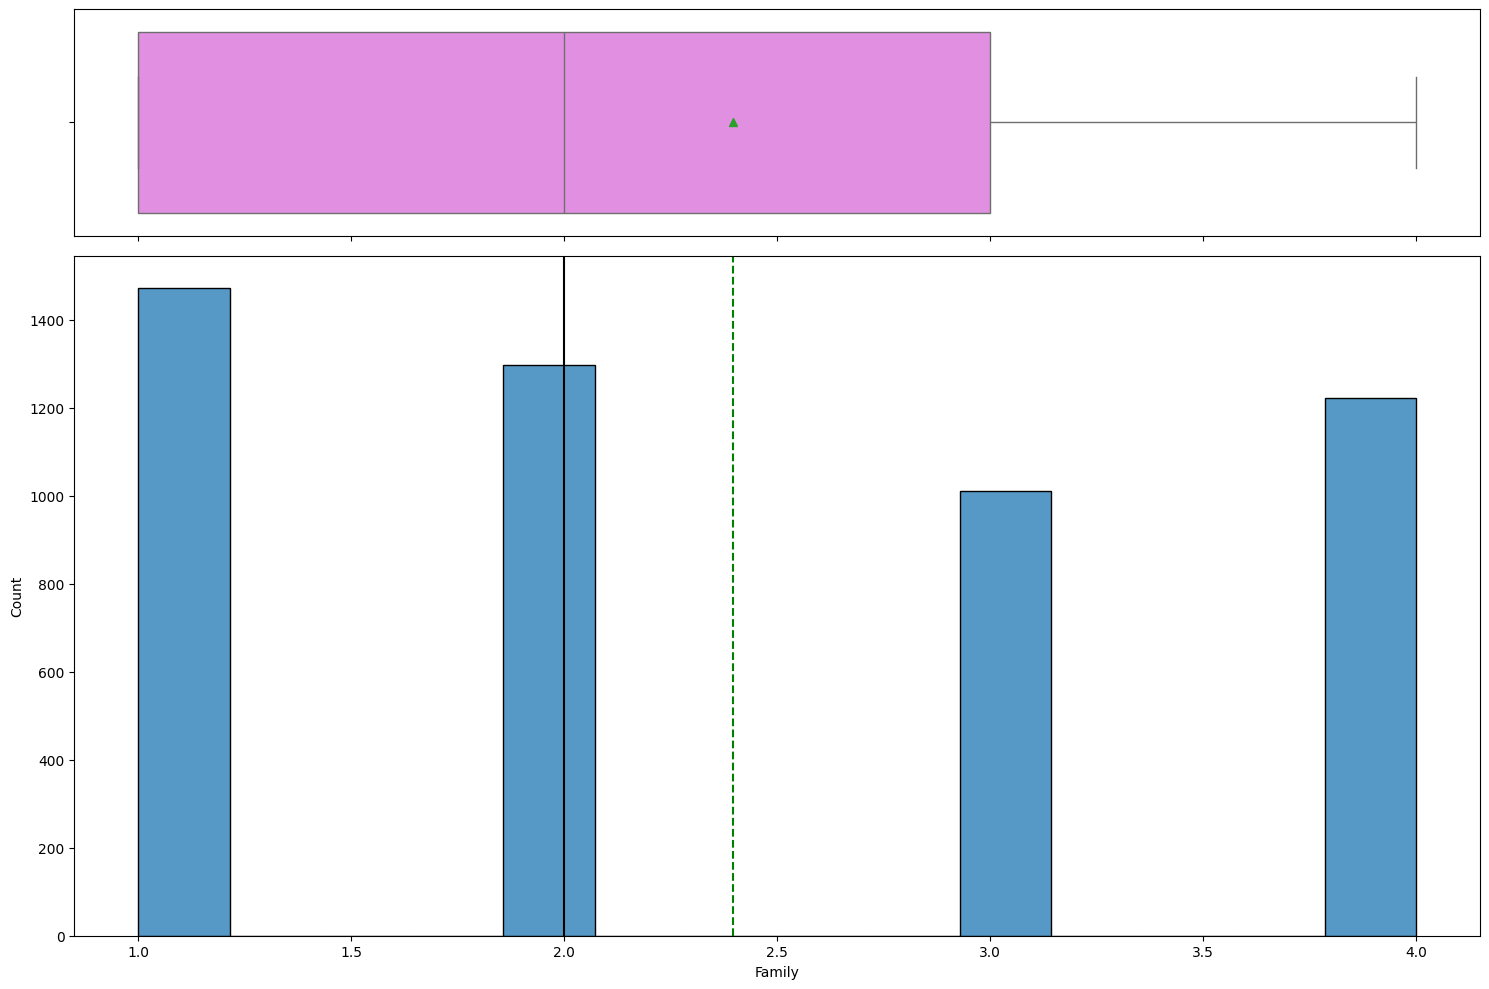

In [42]:
#بر اساس تعداد اعضای خانواده
labeled_barplot(data, "Family")
histogram_boxplot(data, "Family")

In [43]:
#از نمودار جعبه‌ای، به نظر می‌رسد توزیع خانواده به سمت راست متمایل است اما در نمودار هیستوگرام واضح نیست
#اکثر مشتریان دارای اندازه خانواده ۱ نفر هستند. این می‌تواند استنباط کند که مشتریان مجرد اکثریت را تشکیل می‌دهند

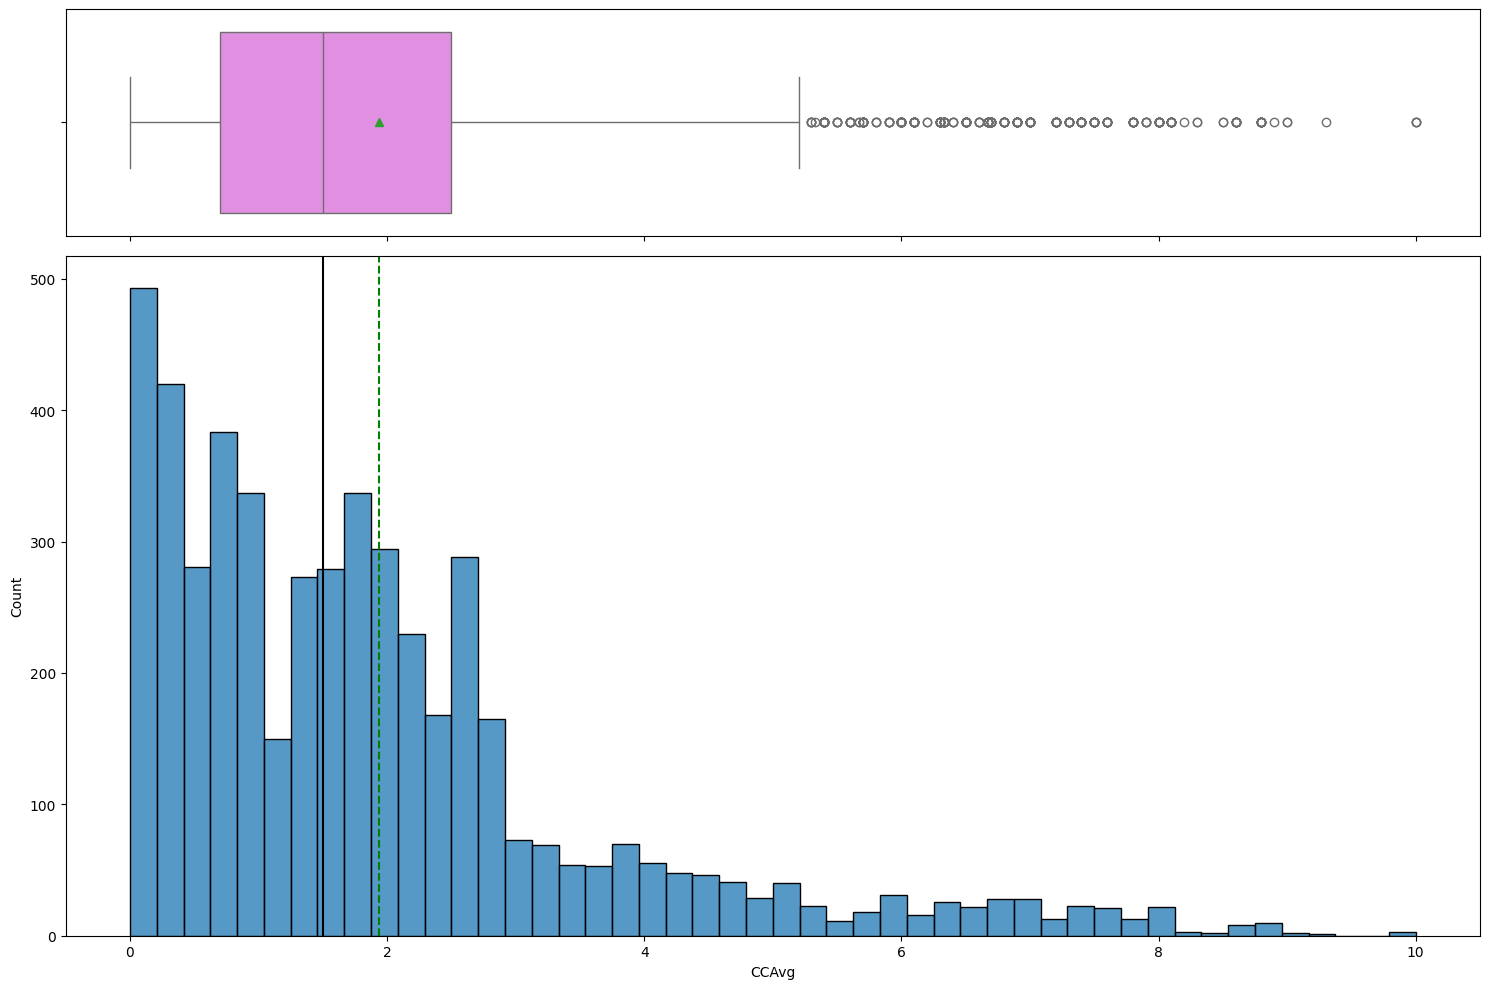

In [44]:
#CCVG - میانگین هزینه‌های کارت‌های اعتباری
histogram_boxplot(data, "CCAvg")

In [45]:
#توزیع این ستون به سمت راست کج شده است. ما داده‌های پرت را در ستون مشاهده می‌کنیم

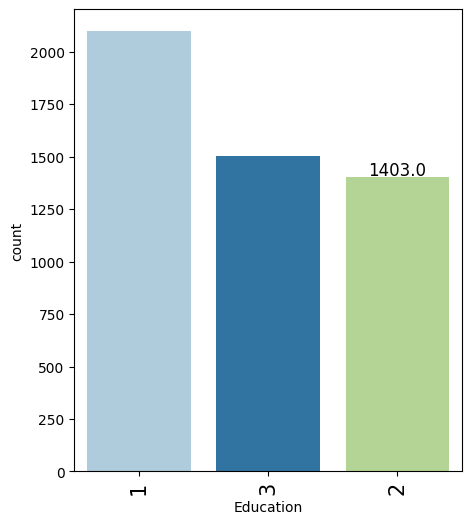

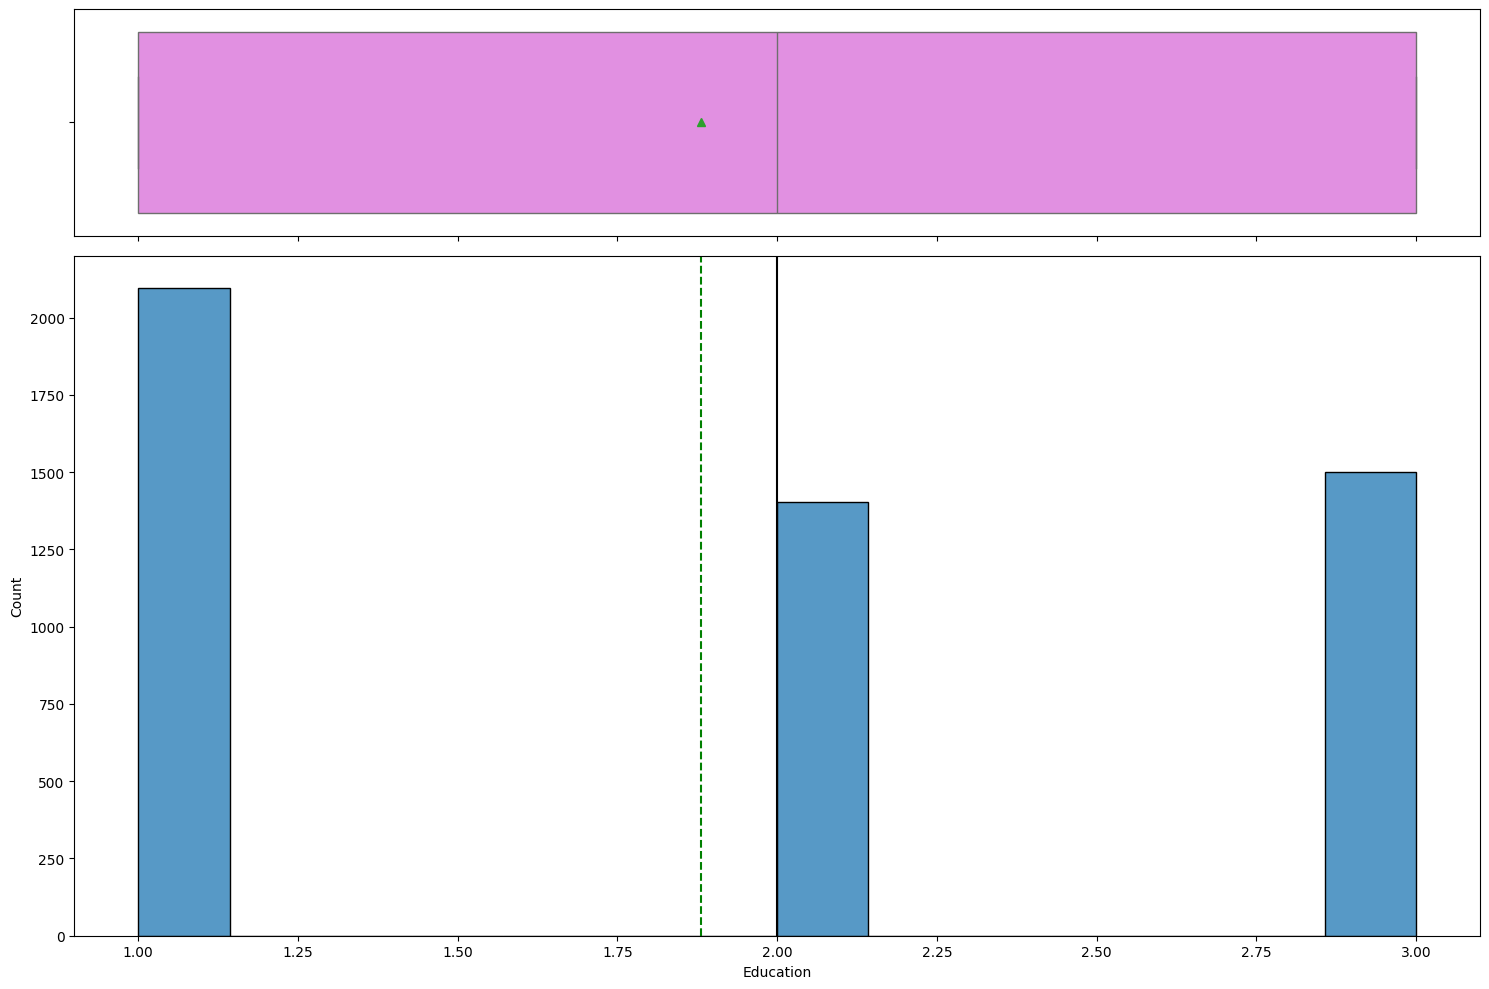

In [46]:
#تحصیلات
labeled_barplot(data, "Education")
histogram_boxplot(data, "Education")

In [47]:
#توزیع برای تحصیلات کمی به سمت راست متمایل است. مشتریانی که تحصیلات کارشناسی دارند و اکثریت را در مجموعه داده‌ها تشکیل می‌دهند

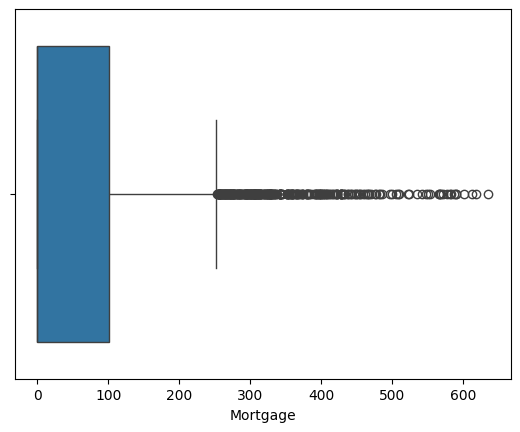

In [48]:
#وام مسکن
sns.boxplot(data=data, x="Mortgage")
plt.show()

In [49]:
#به نظر می‌رسد توزیع وام مسکن به شدت به سمت راست متمایل است. ما موارد پرت زیادی را در این ستون‌ها مشاهده می‌کنیم و خواستار بررسی بیشتر هستیم

In [50]:
# تابعی برای رسم نمودار دایره‌ای
def pie_plot(df,feature,title):
    pyfig, axis1 = plt.subplots()
    explode = (0, 0.15)
    axis1.pie(df[feature], explode=explode, labels=loan_stats["Labels"], autopct='%1.1f%%', shadow=True, startangle=60)
    axis1.axis('equal')  
    plt.title(title)
    plt.show()

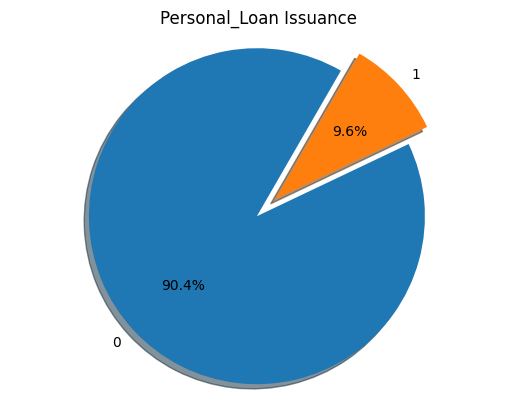

In [51]:
loan_stats =pd.DataFrame( data['Personal_Loan'].value_counts(normalize=True)).reset_index()
loan_stats.columns =["Labels","Personal Loan"]
pie_plot(loan_stats,"Personal Loan","Personal_Loan Issuance")

In [52]:
#تنها ۹.۶٪ از مشتریان، وام شخصی ارائه شده در طول کمپین قبلی را پذیرفتند.

#ما تعداد قابل توجهی از مشتریان را مشاهده می‌کنیم که وام‌های شخصی را نمی‌پذیرند

#این موضوع، اوج رفتار را به ما نشان می‌دهد، زیرا باید مدلی بسازیم که به ما در شناسایی مشتریانی که می‌توانند این تسهیلات را بپذیرند، کمک کند

In [53]:
#حساب اوراق بهادار
securities_stats = pd.DataFrame(data["Securities_Account"].value_counts(normalize=True)).reset_index()
securities_stats.columns = ["Labels", "Securities_Account"]
securities_stats

Labels  Securities_Account
0       0             0.89560
1       1             0.10440

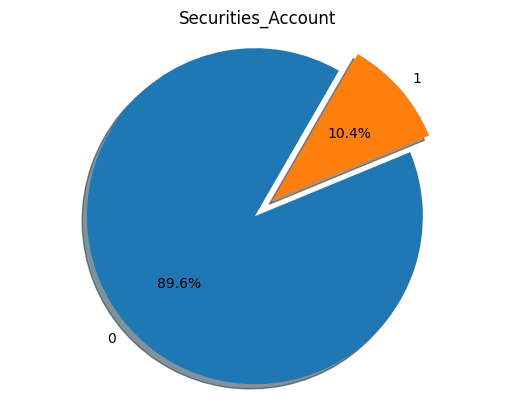

In [54]:
pie_plot(securities_stats, "Securities_Account", "Securities_Account")
#علاوه بر این، تنها 10٪ از مشتریان اوراق بهادار نزد بانک دارند

In [55]:
#حساب سپرده گواهی دار
cd_Account = pd.DataFrame(data['CD_Account'].value_counts(normalize=True)).reset_index()
cd_Account.columns = ["Labels", "CD_Account"]
cd_Account

Labels  CD_Account
0       0     0.93960
1       1     0.06040

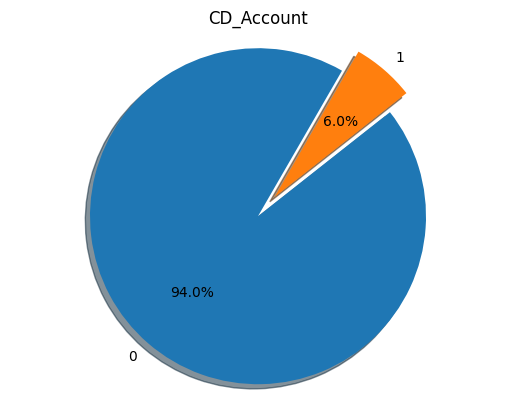

In [56]:
pie_plot(cd_Account, "CD_Account", "CD_Account")
#فقط ۶٪ از مشتریان گواهی سپرده نزد بانک دارند

In [57]:
#online
online_stats = pd.DataFrame(data['Online'].value_counts(normalize=True)).reset_index()
online_stats.columns = ["Labels", "Online"]
online_stats

Labels  Online
0       1 0.59680
1       0 0.40320

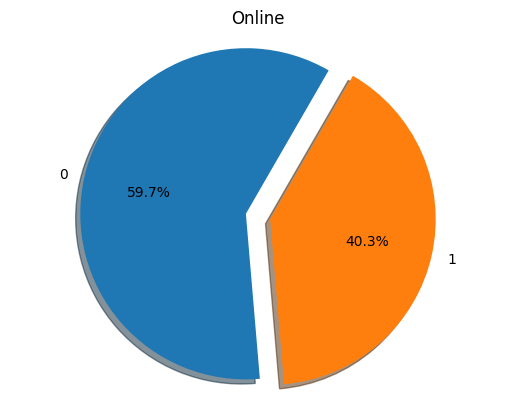

In [58]:
pie_plot(online_stats, "Online", "Online")
#تقریباً ۶۰٪ از مشتریان بانک از امکانات بانکداری اینترنتی ارائه شده توسط بانک استفاده می‌کنند، در حالی که ۴۰٪ از این امکانات استفاده نمی‌کنند

In [59]:
#کارت اعتباری
creditcard_stats = pd.DataFrame(data["CreditCard"].value_counts(normalize=True)).reset_index()
creditcard_stats.columns = ["Labels", "CreditCard"]
creditcard_stats

Labels  CreditCard
0       0     0.70600
1       1     0.29400

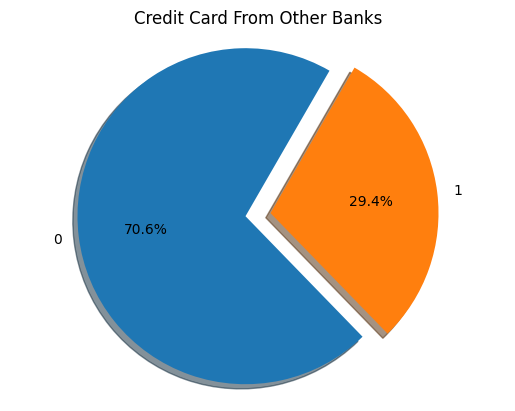

In [60]:
pie_plot(creditcard_stats, "CreditCard", "Credit Card From Other Banks")
#فقط ۲۹٪ از مشتریان از تسهیلات کارت اعتباری سایر بانک‌ها استفاده می‌کنند

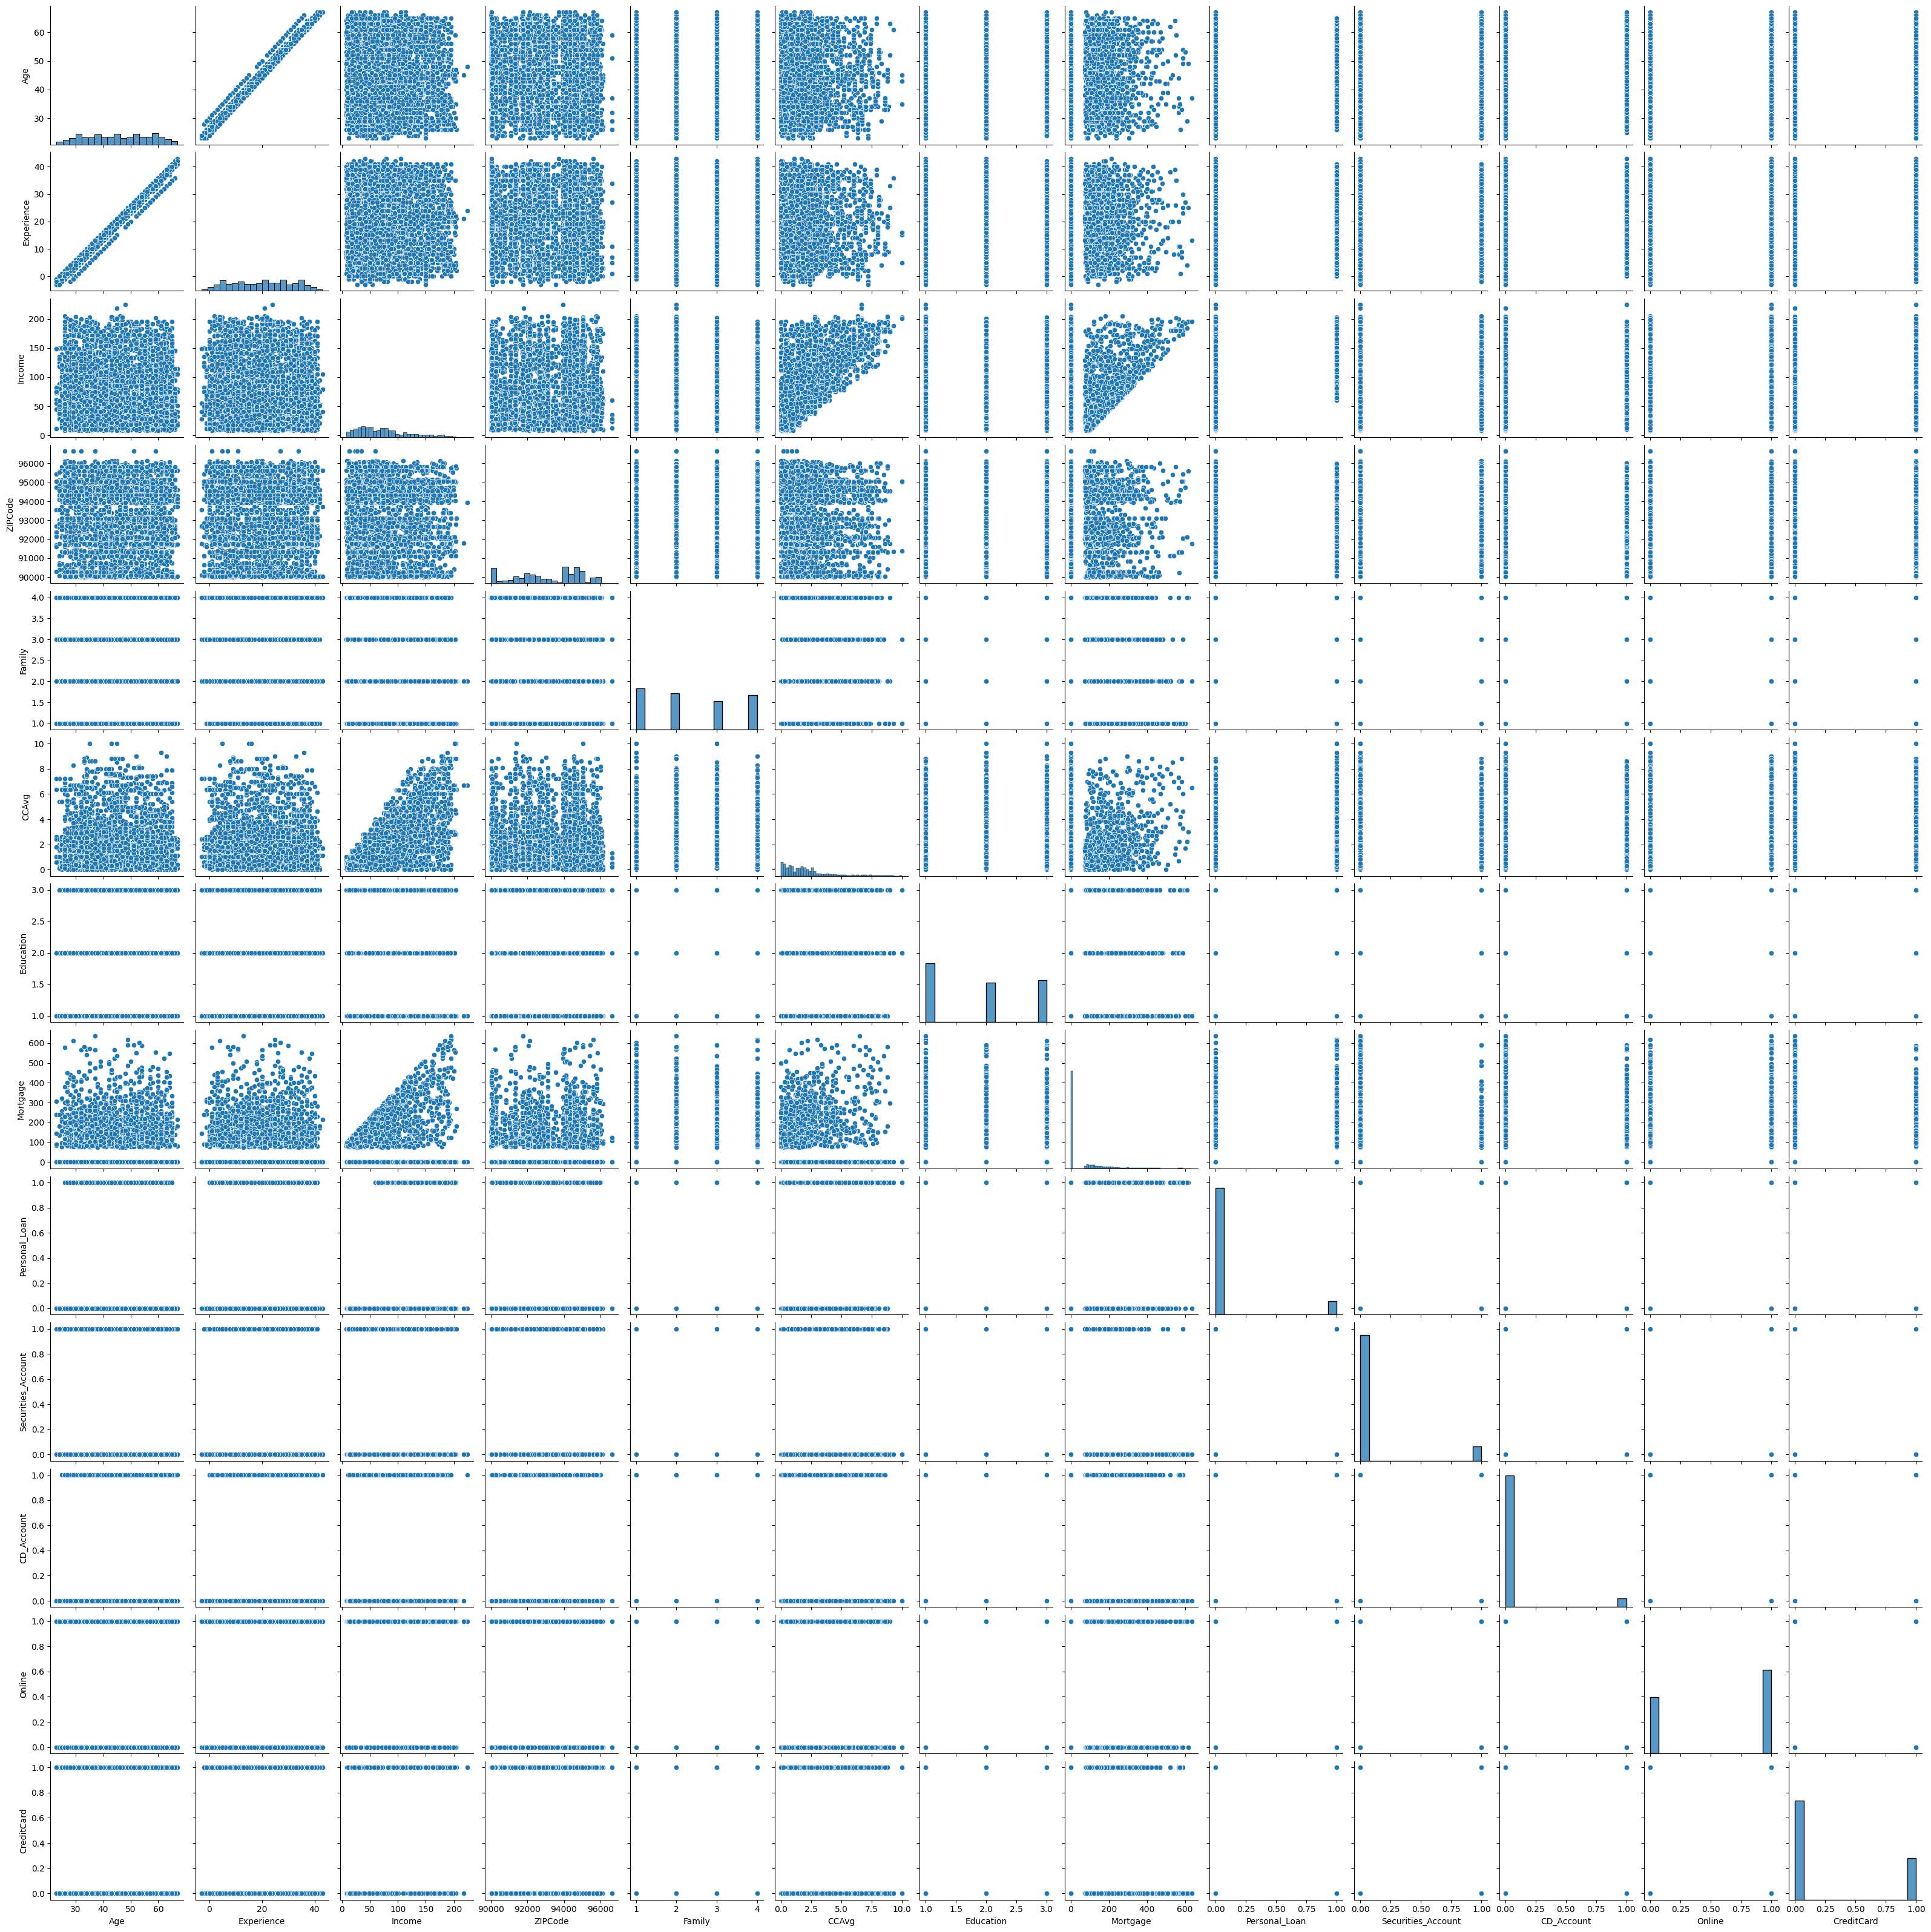

In [61]:
#تحلیل دو متغیره
sns.pairplot(data)

In [62]:
###📈 یک رابطه خطی مثبت قوی (high positive correlation) بین Age و Experience وجود داره

###توزیع سنی داده‌ها نرمال (Normal Distribution) است.
#بیشتر مشتری‌ها در محدوده‌ی میانی سن قرار دارن و افراد خیلی جوان یا خیلی مسن کم‌ترن

###📈 یعنی توزیع Experience هم شبیه توزیع نرماله — به‌نوعی هم‌پوشانی با توزیع سن.
#بیشتر افراد تجربه‌ی متوسط دارن (مثلاً ۱۰ تا ۲۰ سال).تعداد کسانی که تجربه خیلی کم یا خیلی زیاد دارن کمتره

###  ZIP Code، نقطه‌ها پراکنده و بی‌الگو هستن → هیچ رابطه‌ای با وام (Personal_Loan) نداره
#📉 کد پستی برای پیش‌بینی گرفتن وام مفید نیست

###🔹 خانواده و تحصیلات همبستگی نسبتاً کمی با وام‌های شخصی دارند

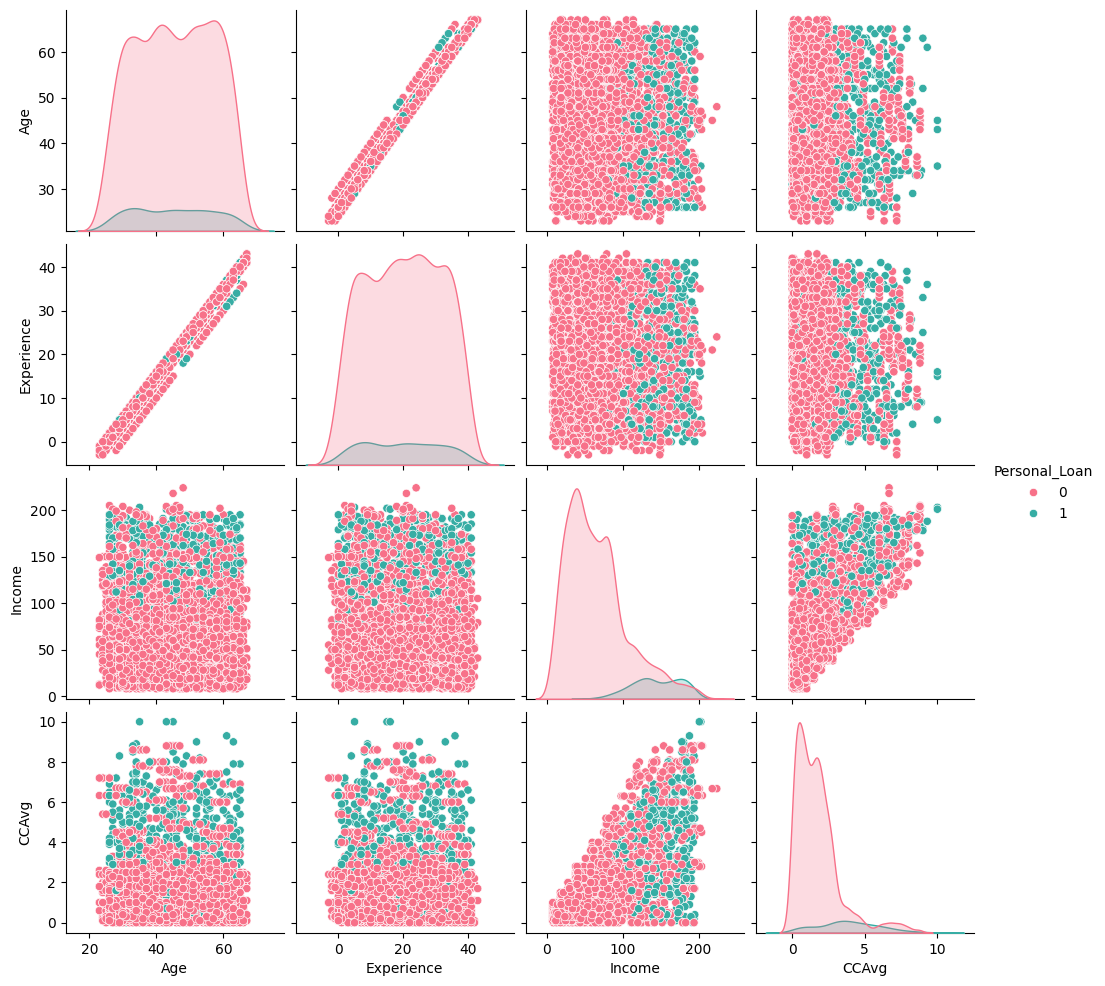

In [63]:
sns.pairplot(
    data,
    vars=["Age", "Experience", "Income", "CCAvg"],  # فقط متغیرهای عددی مهم
    hue="Personal_Loan",  # رنگ‌بندی بر اساس وضعیت وام
    palette="husl",
    diag_kind="kde"  # برای توزیع نرم‌تر روی قطر
)
plt.show()


In [64]:
###🔹 Income vs CCAvg: 
#نقاط سبز بیشتر در بالا سمت راست جمع شدن، یعنی مشتری‌هایی که درآمد و میانگین هزینه کارت اعتباری بیشتری دارن، احتمال بیشتری برای گرفتن وام دارند
#Income و CCAvg → راست‌چوله (Right Skewed)/هرچه انحراف از نرمال بیشتر، احتمالاً نیاز به Log Transformation داریم

### مشتری هایی با محدوده سنی میانی و تجربه میانی احتمال بیشتری برای دریافت وام دارند
###Income و CCAvg سیگنال‌های مهم برای Personal_Loan هستند
###Age و Experience همبستگی بالایی دارند و ممکنه استفاده از یکی برای جلوگیری از هم خطی چندگانه multicollinearity ضروری باشه

In [65]:
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target = " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target = " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


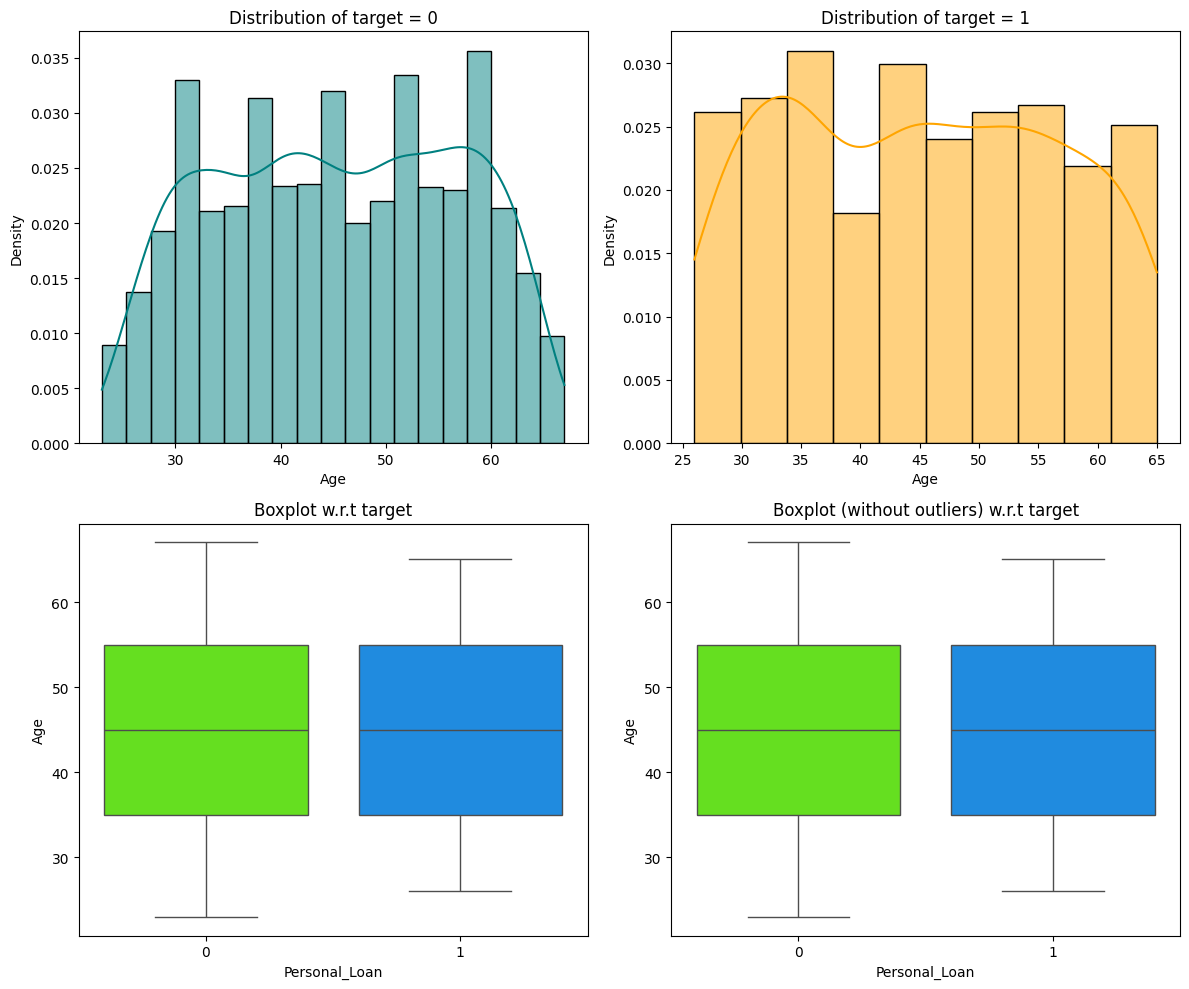

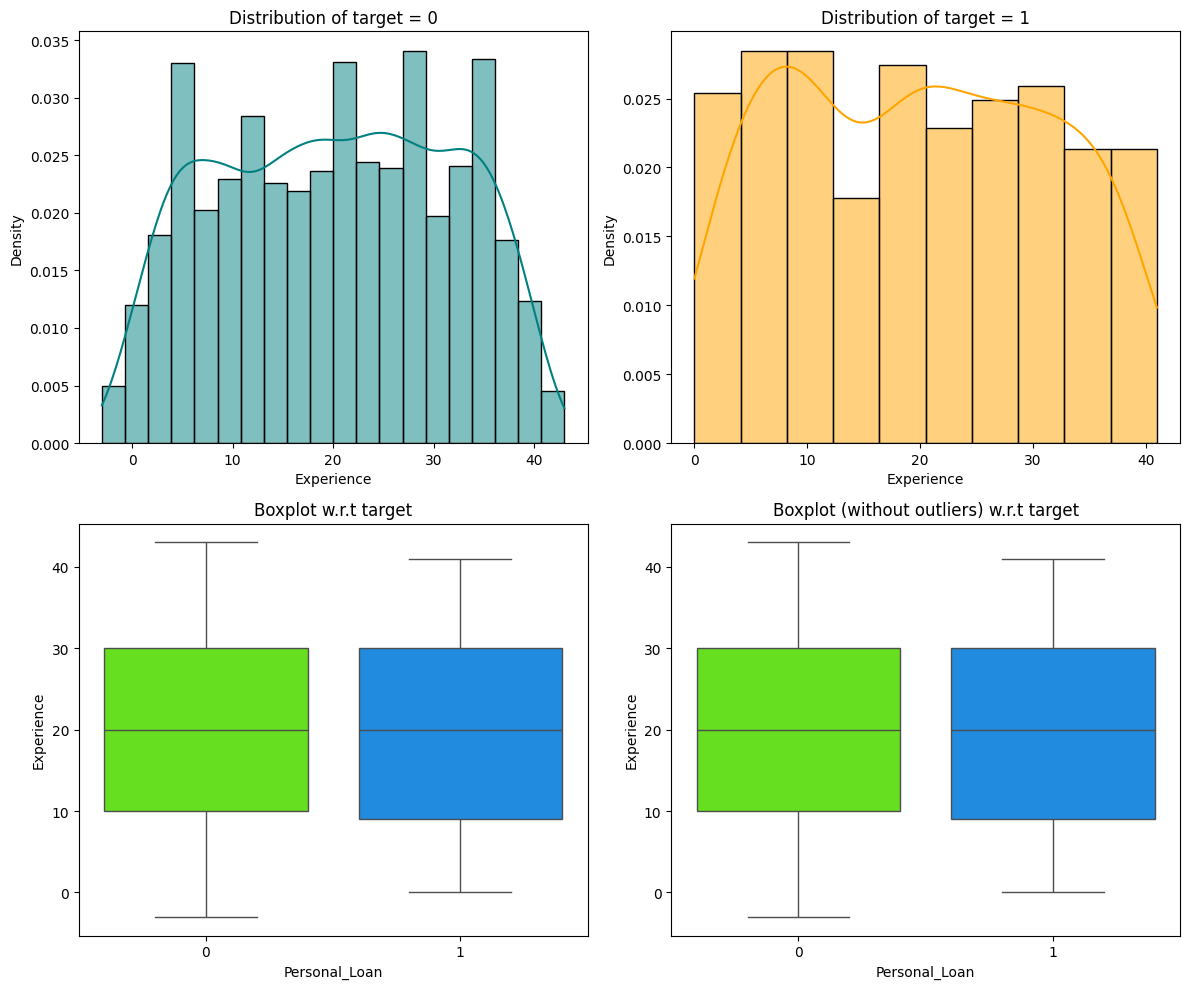

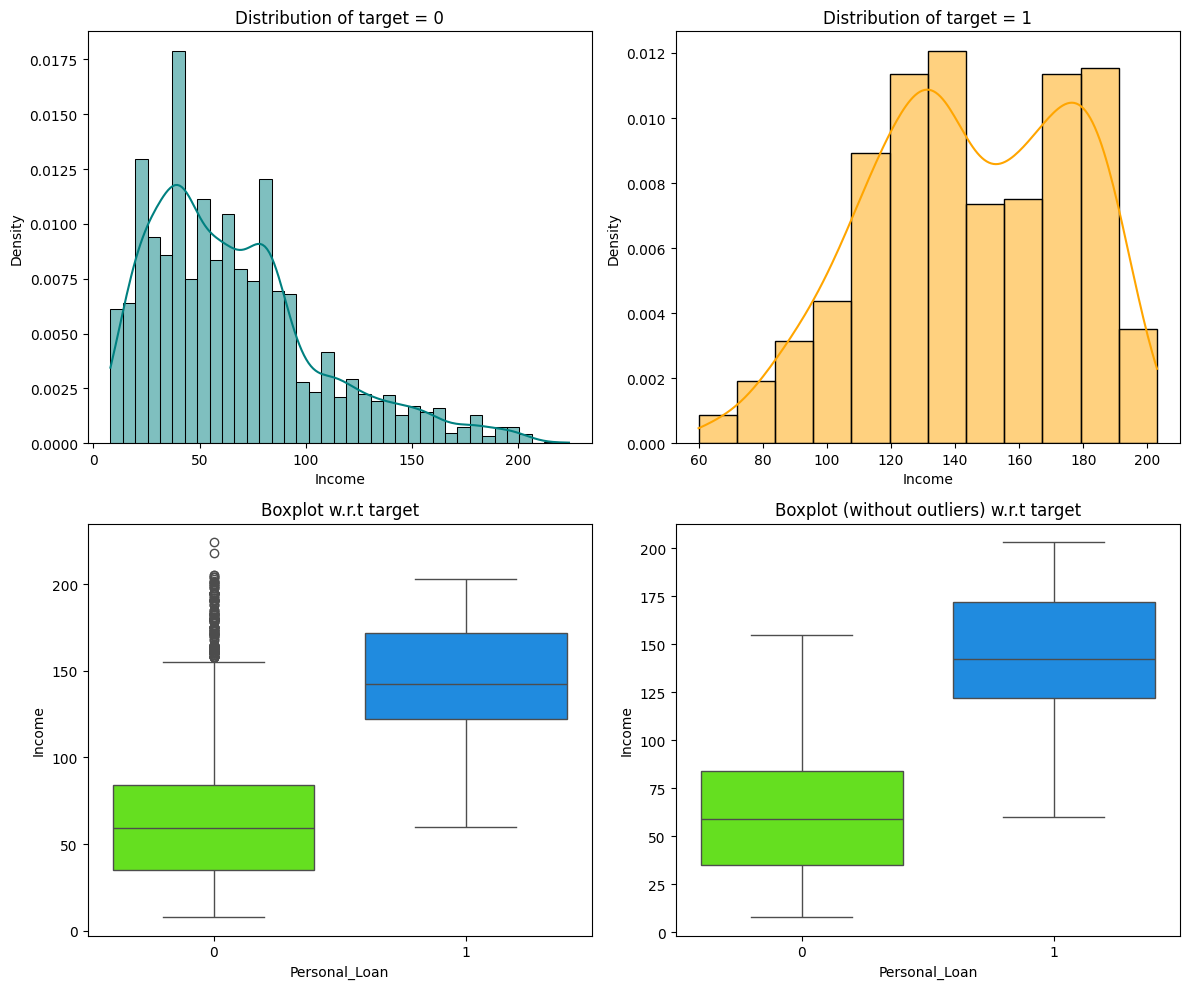

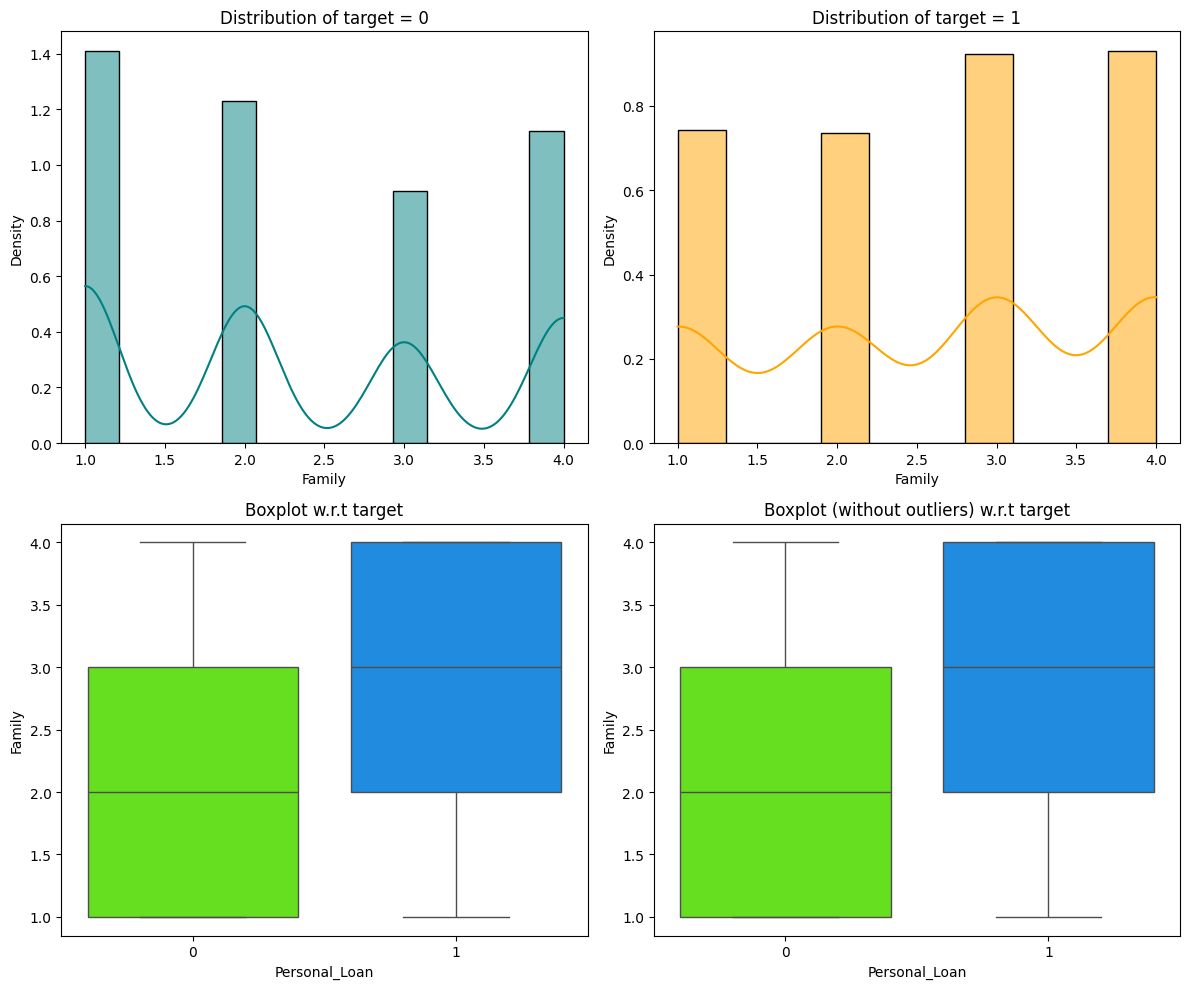

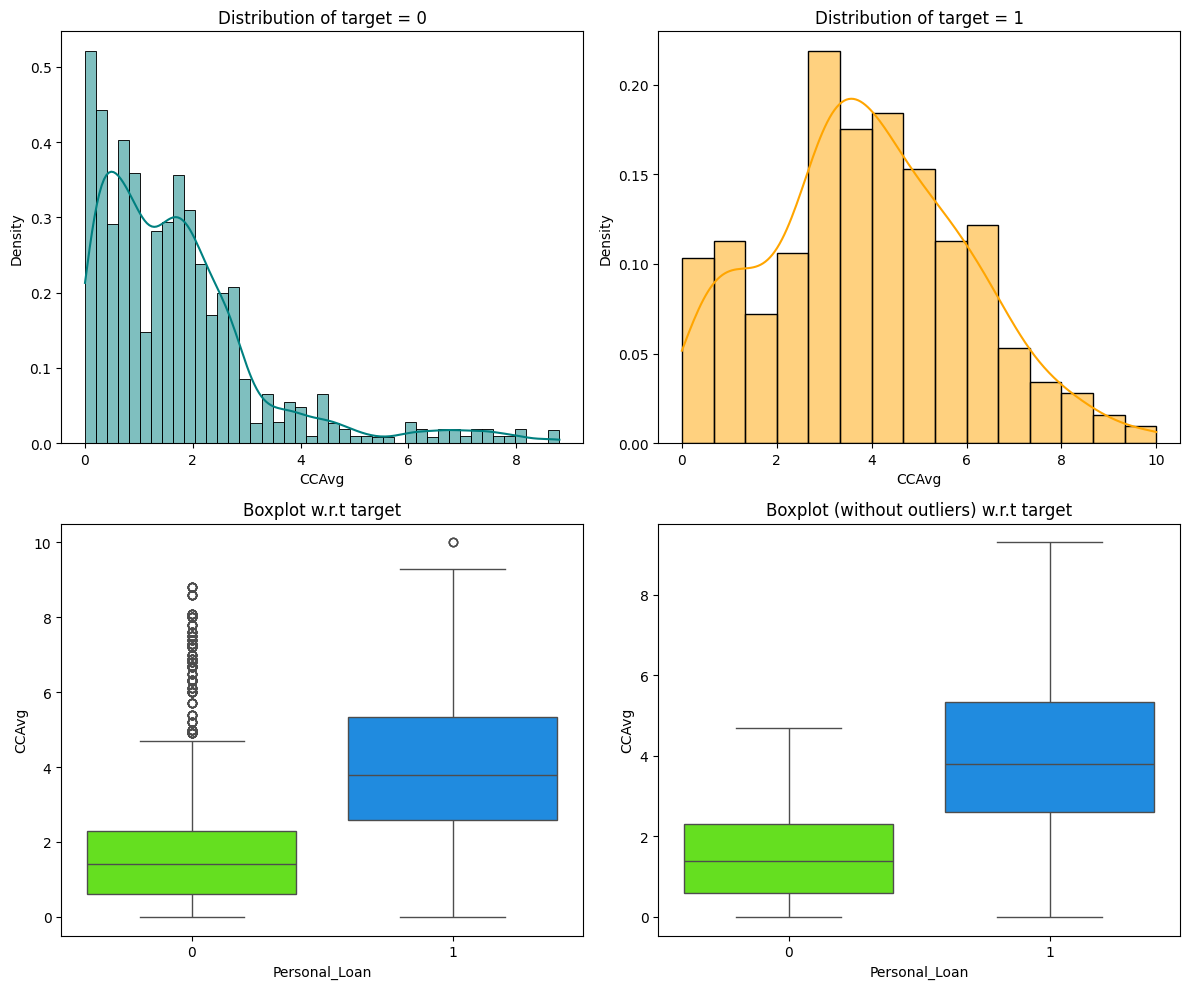

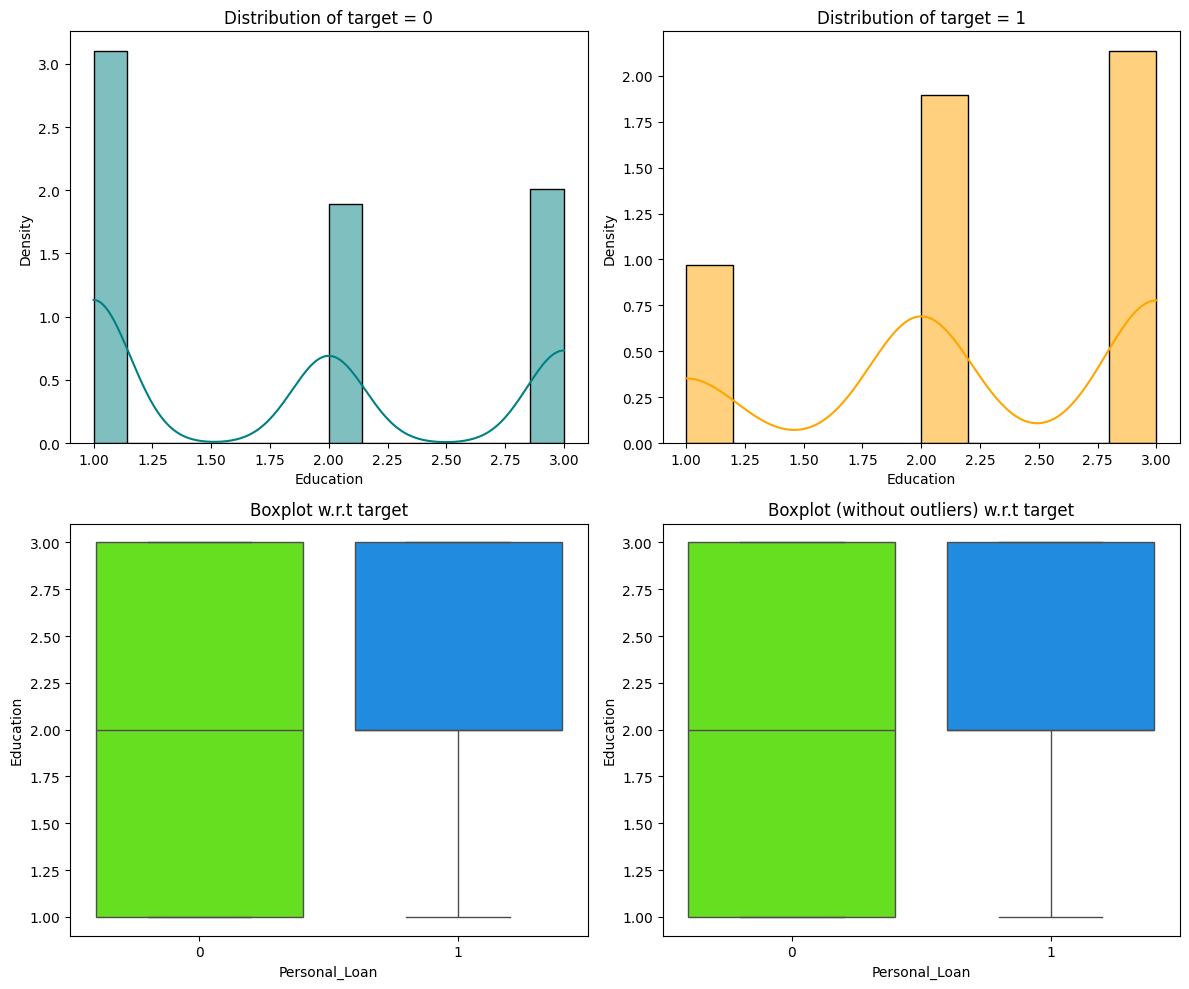

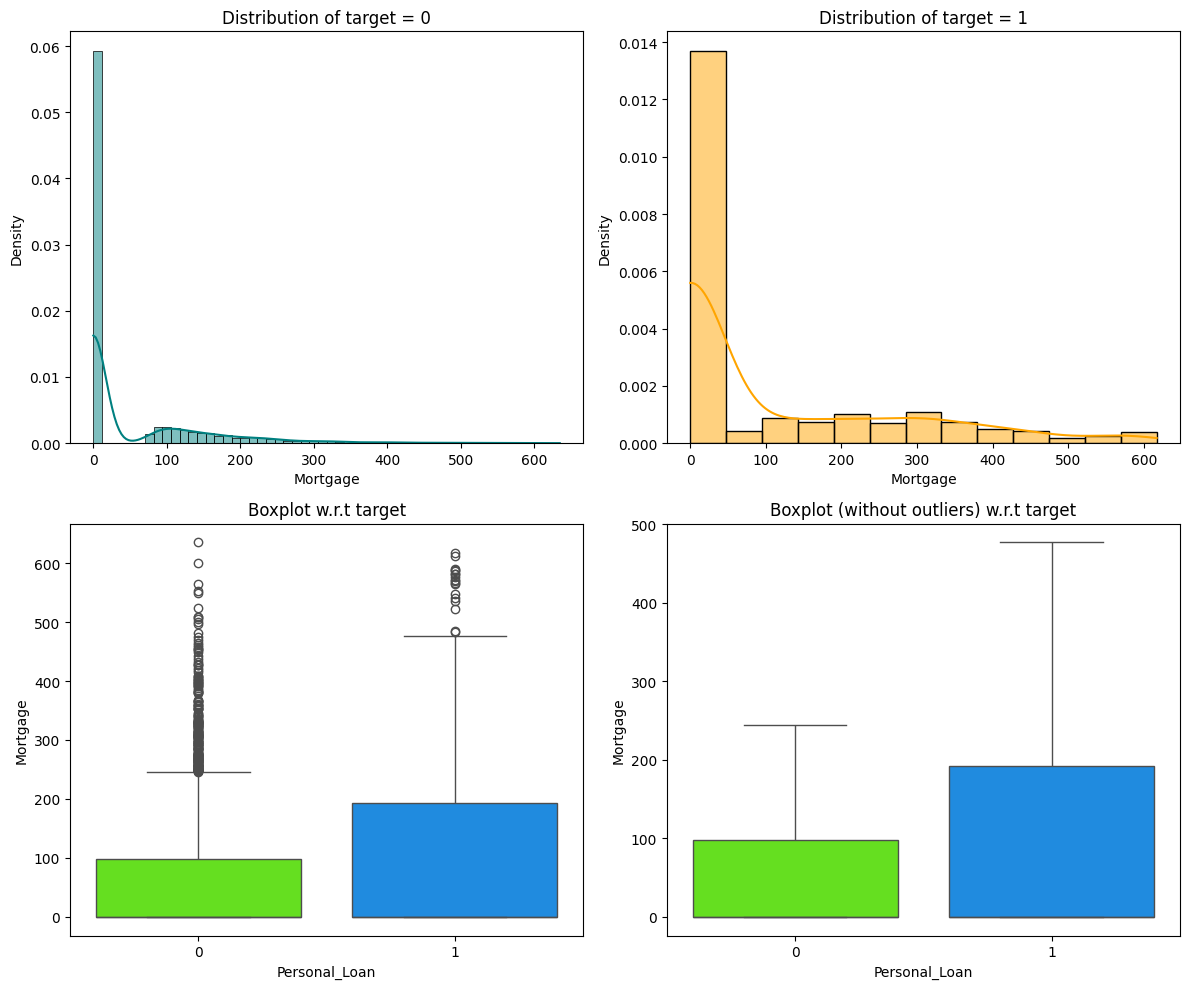

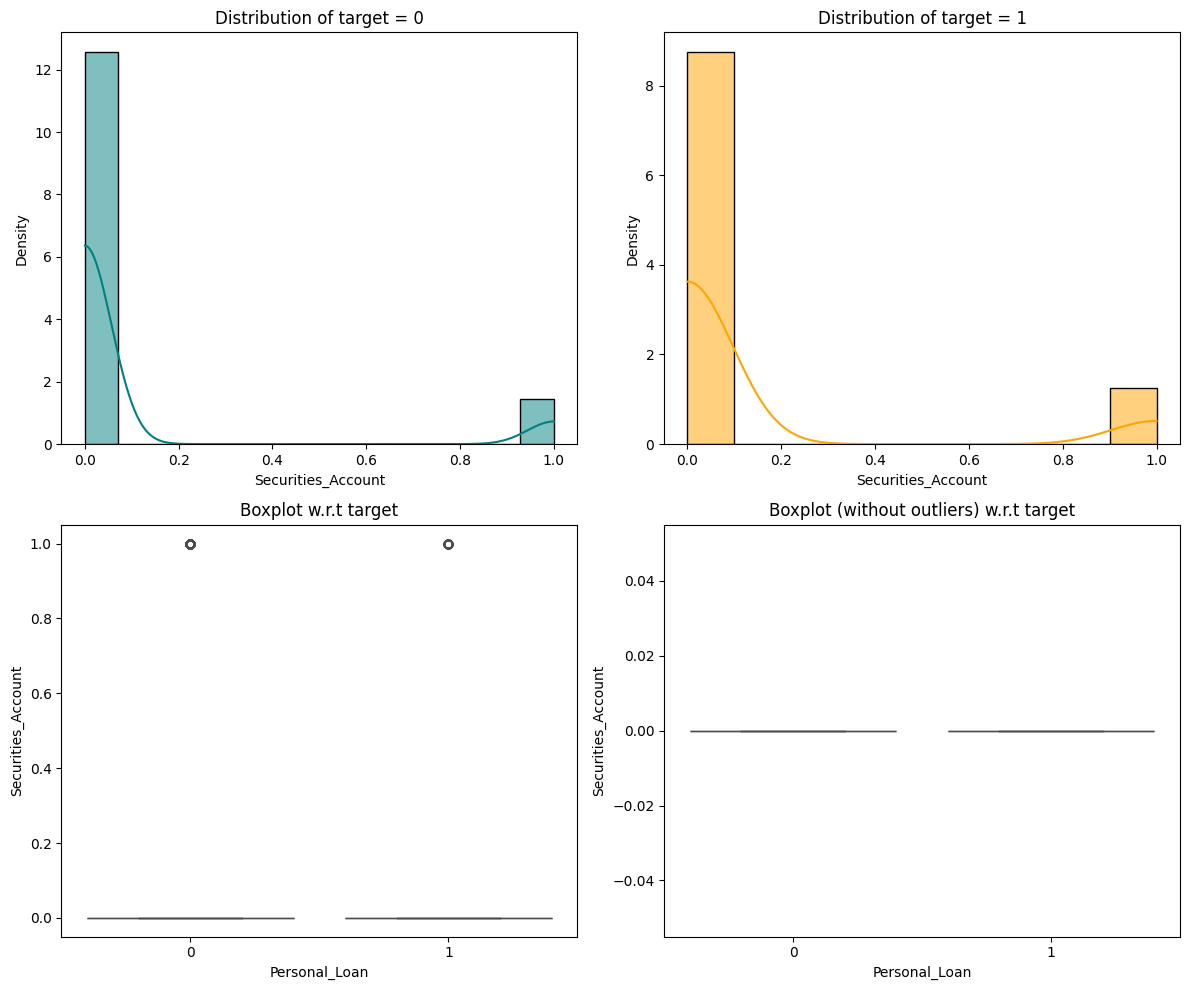

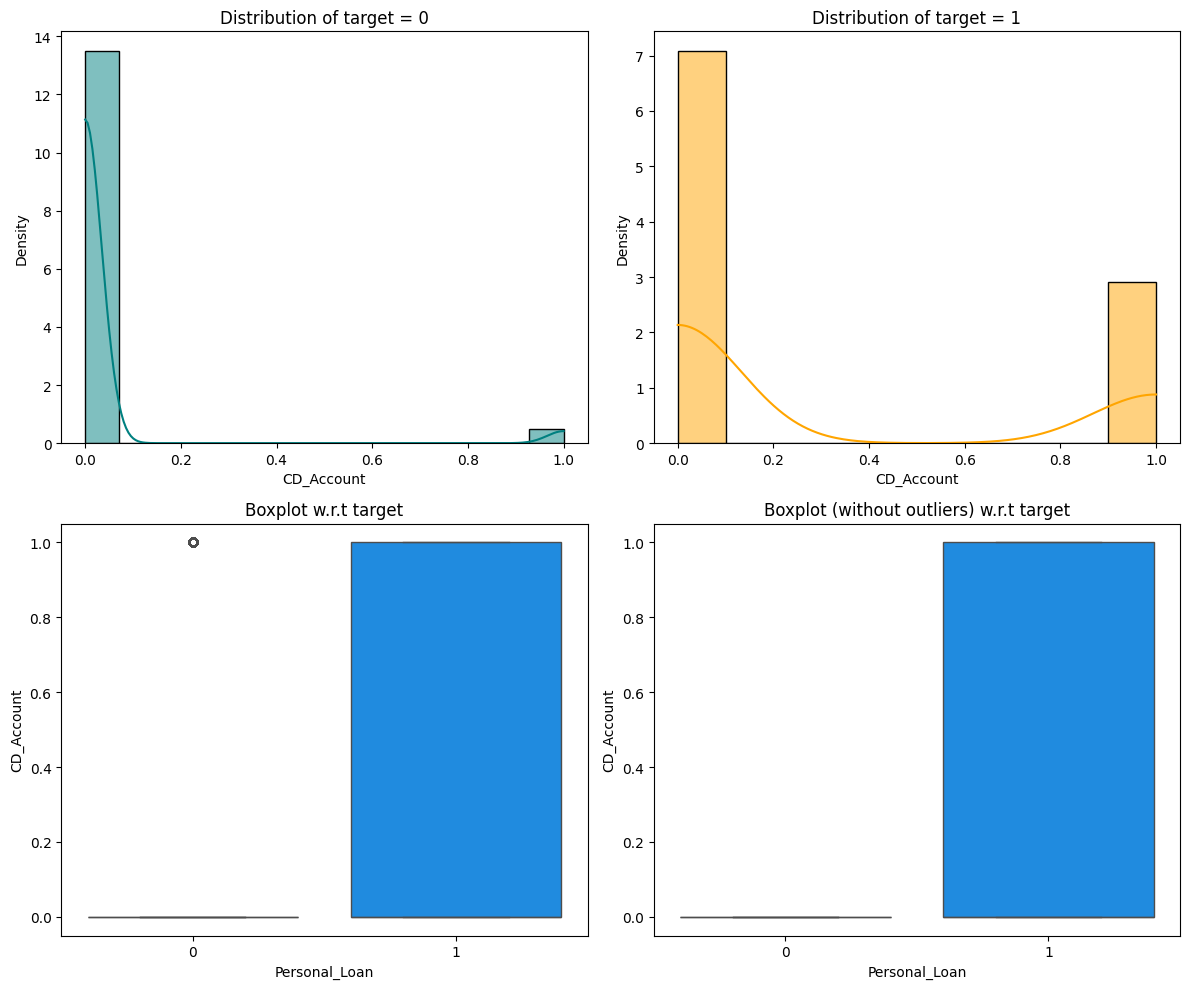

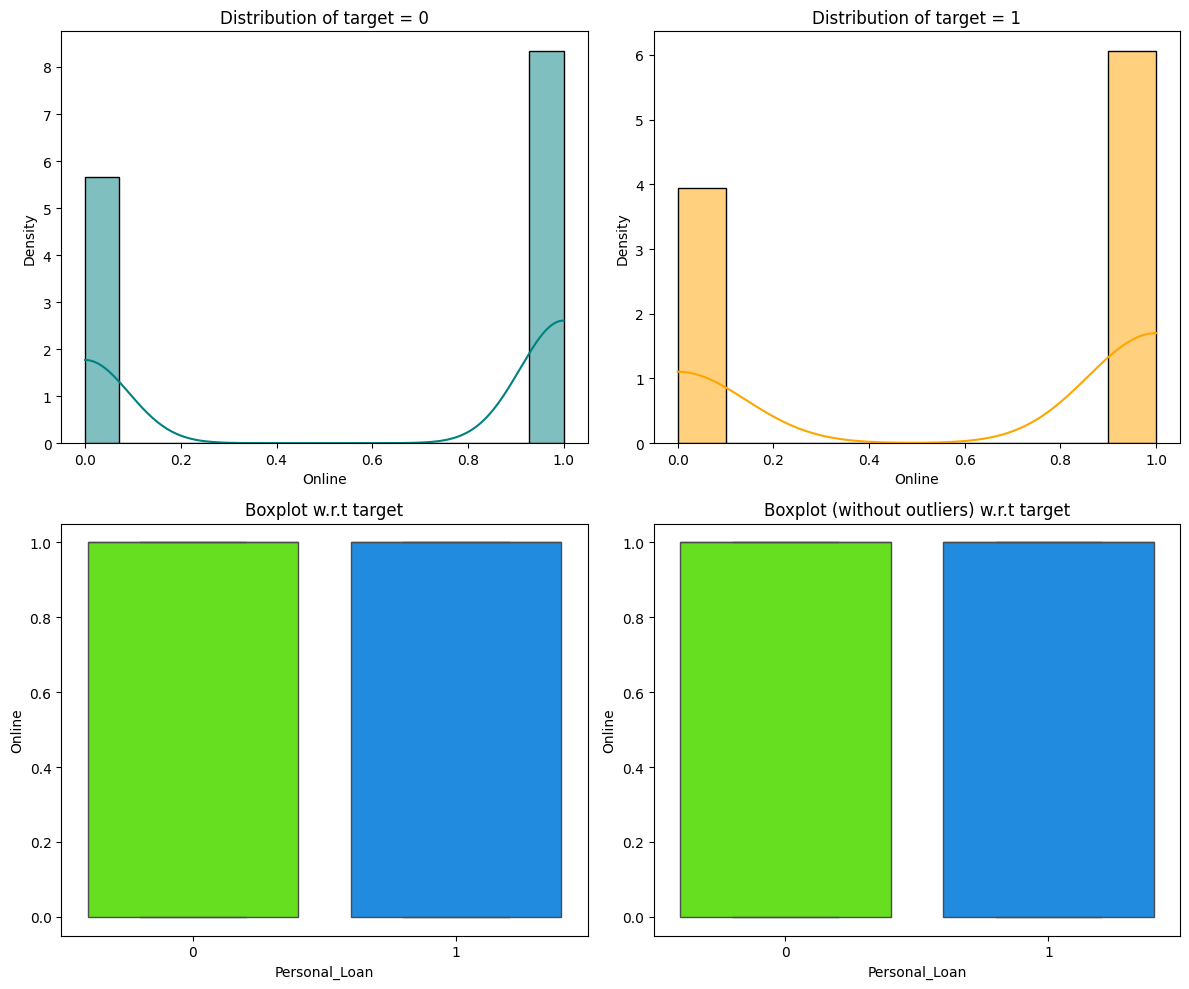

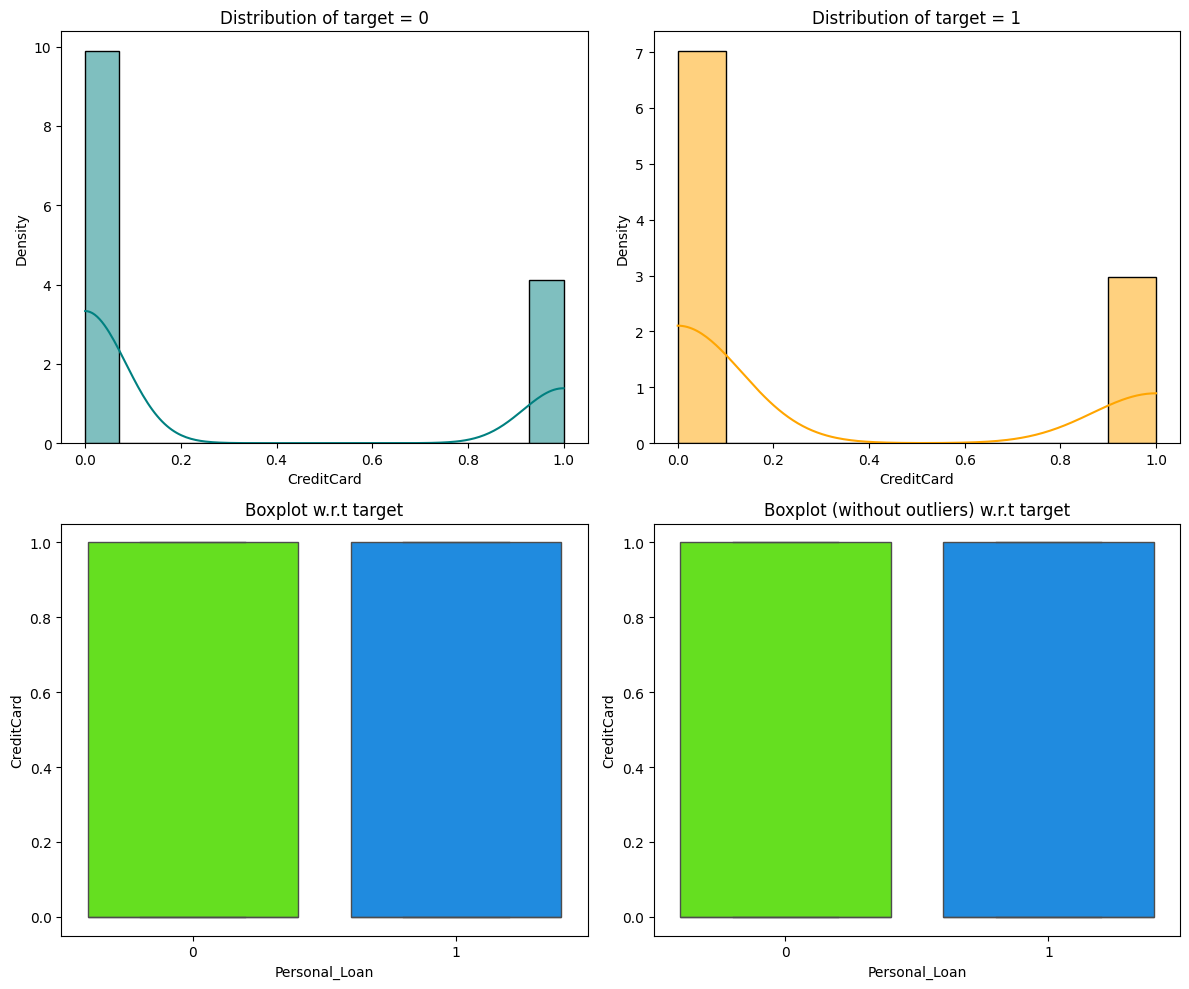

In [66]:
#تحلیل هر متغیر با توجه به هدف
valid_options = ["ZIPCode", "Personal_Loan"] ## Removing Zip code & target from loop
for column in data.columns:
    if column not in valid_options:
        distribution_plot_wrt_target(data,column, "Personal_Loan")
           

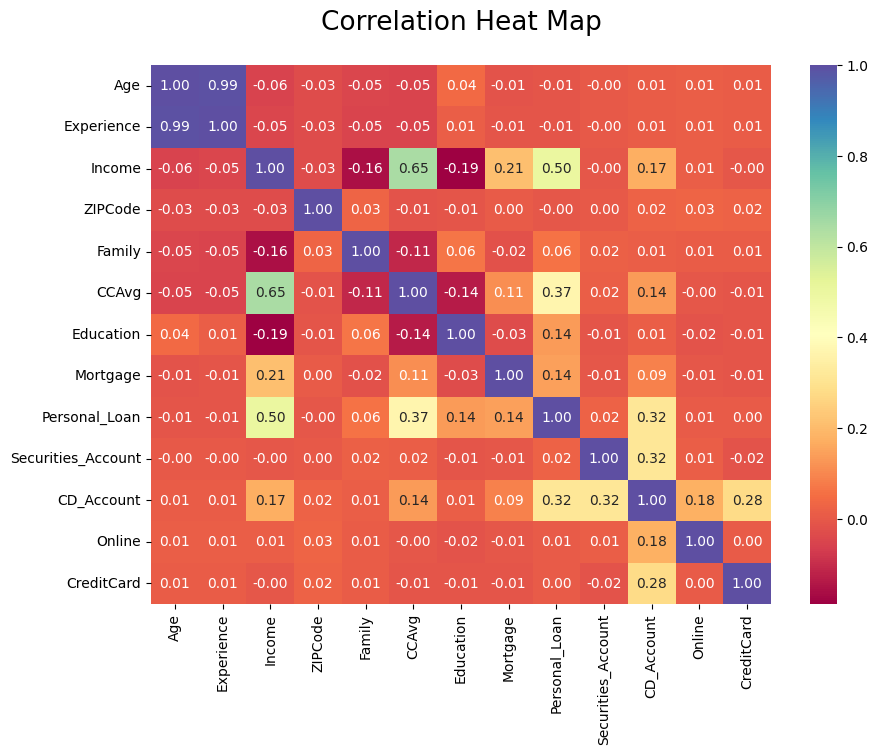

In [67]:
#نقشه ی همبستگی
def correlation_heatmap(data):
    plt.figure(figsize = (10,7))
    plt.title('Correlation Heat Map', y=1.05, size=19)
    sns.heatmap(data.corr(), cmap='Spectral', annot=True, fmt='.2f')  
    
correlation_heatmap(data)

In [68]:
#تحلیل داده‌ها و نتایج حاصل از بررسی توصیفی (EDA)

#در این مطالعه، هدف شناسایی متغیرهایی است که بر احتمال دریافت وام شخصی از سوی مشتریان تأثیرگذارند. پس از بررسی آماری و گرافیکی داده‌ها، نتایج زیر به‌دست آمد:

#سن (Age) و سابقه کاری (Experience) هر دو توزیع نرمال دارند و به‌شدت با یکدیگر همبسته‌اند (r ≈ 0.99). از آن‌جا که بیانگر ویژگی مشابهی هستند، برای جلوگیری از چندخطی بودن در مدل، یکی از آن‌ها حذف خواهد شد.

#درآمد (Income) متغیری با توزیع راست‌چول است. مشتریان با درآمدهای بالاتر از ۱۰۰ هزار دلار، تمایل بیشتری به دریافت وام شخصی دارند.

#تعداد اعضای خانواده (Family) رابطه‌ی مثبتی با پذیرش وام دارد؛ خانواده‌های دو نفره و بزرگ‌تر بیشتر وام گرفته‌اند.

#تحصیلات (Education) اثر قابل‌توجهی دارد؛ مشتریان دارای تحصیلات دانشگاهی یا بالاتر بیشترین میزان پذیرش وام را دارند.

#وام مسکن (Mortgage) به عنوان شاخصی از اعتبار مالی، ارتباط مثبتی با دریافت وام شخصی نشان می‌دهد.

#حساب سپرده‌ی بلندمدت (CD Account) از قوی‌ترین پیش‌بینی‌کننده‌هاست؛ مشتریان دارای این حساب به میزان قابل‌توجهی بیشتر وام دریافت کرده‌اند.

#میانگین هزینه کارت اعتباری (CCAvg) نیز متغیری تأثیرگذار است؛ هرچه میزان استفاده از کارت اعتباری بیشتر باشد، احتمال گرفتن وام نیز افزایش می‌یابد.

#دسترسی آنلاین (Online) و کارت اعتباری از سایر بانک‌ها (CreditCard) تأثیر قابل ملاحظه‌ای بر متغیر هدف ندارند.

#کد پستی (ZIP Code) هیچ همبستگی معناداری با احتمال دریافت وام ندارد و از تحلیل مدل حذف می‌شود.

#در مجموع، متغیرهای Income، Education، Mortgage، CD Account و CCAvg بیشترین تأثیر را بر پذیرش وام شخصی دارند و در مدل‌سازی پیش‌بینی (Model Training) مورد استفاده قرار خواهند گرفت

In [69]:
#Data Preprocessing
df = data.copy()
df.info()
df.isnull().sum()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
1792   46          20     118    93009       1 5.70000          1         0   
4834   49          23      70    94305       1 0.30000          1       217   
2340   33           9      44    94112       1 1.20000          1         0   
736    61          35     152    91016       3 3.30000          3         0   
884    38          13      55    91709       2 1.10000          2         0   
4350   64          39     101    95134       4 3.40000          2         0   
4493   52          28      74    96064       1 2.60000          2         0   
818    51          27      42    95039       4 1.10000          2         0   
1721   54          29      59    92867       2 2.30000          3       152   
1735   60          36      31    95051       3 0.40000          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
1792              0                   0           1       1           1  
4834              0                   0           0       0           0  
2340              0                   0           0       0           0  
736               1                   0           0       1           0  
884               0                   0           0       1           0  
4350              0                   0           0       0           1  
4493              0                   0           0       1           1  
818               0                   0           0       1           1  
1721              0                   0           0       1           0  
1735              0                   0           0       1           1

In [70]:
#از EDA هیچ همبستگی بین این ستون و متغیر هدف مشاهده نکردیم. آن را حذف خواهیم کرد.
df.drop("ZIPCode", axis=1, inplace=True)

In [71]:
#بررسی مقادیر منفی
## بررسی تعداد مقادیر منفی در ستون Experience
print("We have %2d negative values on the experience column" % df[df['Experience'] < 0].shape[0])

We have 52 negative values on the experience column


In [72]:
#تبدیل مقادیر منفی به صفر
df['Experience'] = df['Experience'].apply(lambda x : 0 if x < 0 else x)
#جایگذاری با Median
df['Experience'] = df['Experience'].replace(0,df['Experience'].median())
# بررسی تعداد مقادیر منفی در ستون تجربه پس از درمان
print("We have %2d negative values on the experience column" % df[df['Experience'] < 0].shape[0])

We have  0 negative values on the experience column


In [73]:
#ما ستون‌های کد پستی و شناسه را از مجموعه داده‌ها حذف کرده‌ایم، زیرا آنها هیچ مقدار واقعی ندارند. 
#با ستون تجربه نیز به همین ترتیب رفتار شد، به این صورت که مقادیر منفی حذف و مقادیر میانه به آنها اضافه شد.

In [74]:
## تعریف یک تابع برای محاسبه معیارهای مختلف برای بررسی عملکرد یک مدل Classification ساخته شده با استفاده از sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    ## پیش‌بینی با استفاده از متغیرهای مستقل
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)     #Accuracy(دقت کلی):نسبت پیش‌بینی‌های درست به کل نمونه‌ها

    recall = recall_score(target, pred)    #Recall(حساسیت): چند درصد از موارد “مثبت واقعی” درست شناسایی شدن

    precision = precision_score(target, pred)   #Precision(دقت مثبت ها)»: از بین پیش‌بینی‌های مثبت، چند درصد واقعاً مثبت بودن

    f1 = f1_score(target, pred)              #F1-score:	میانگین موزون Precision و Recall — مناسب در داده‌های نامتوازن

    ## ایجاد یک دیتافریم از معیارها
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
                           index=[0]
    )
    return df_perf

 ##تابعی برای محاسبه ماتریس درهم‌ریختگی
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

 ## تعریف تابعی برای رسم ماتریس سردرگمی(confusion_matrix)یک مدل طبقه‌بندی 
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
        
     ##رسم نمودار حرارتی (Heatmap)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
        
##  ماتریس درهم‌ریختگی با آستانه (Threshold)
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    ##تابع ارزیابی مدل با آستانه
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
### پیش‌بینی با استفاده از متغیرهای مستقل
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

### ایجاد یک دیتافریم از معیارها
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf 

###تابع رسم منحنی roc/auc
def plot_auc_roc(target,logistic_regression_model,predictors):
    logit_roc_auc_train = roc_auc_score(target, logistic_regression_model.predict_proba(predictors)[:, 1])
    ##محاسبه عددی امتیاز AUC (Area Under Curve) — هرچه به ۱ نزدیک‌تر باشد، مدل بهتره
    
    fpr, tpr, thresholds = roc_curve(target, logistic_regression_model.predict_proba(predictors)[:, 1])
    ##محاسبه‌ی نقاط منحنی ROC:
    #FPR (False Positive Rate) = درصد خطاهای مثبت اشتباهی
    #TPR (True Positive Rate) = درصد تشخیص‌های درست مثبت‌ها
    
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
    plt.plot([0, 1], [0, 1], "r--")
    ## رسم منحنی، خط قرمز مورب نشون‌دهنده عملکرد تصادفی هست (AUC=0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [75]:
#🧩 Model Evaluation Criterion یا معیار ارزیابی مدل

#مدل می‌تواند پیش‌بینی‌های اشتباهی انجام دهد، مانند:
##1️⃣ False Negative (FN) — خطای فرصت از دست‌رفته (Opportunity Loss)
###پیش‌بینی اینکه مشتری (0) وام شخصی را قبول نمی‌کند، اما در واقعیت مشتری آن را قبول خواهد کرد - از دست دادن فرصت (FN)

##2️⃣ False Positive (FP) — خطای هزینه‌ی بازاریابی (Marketing Resource Loss)
###پیش‌بینی اینکه مشتری (1) وام شخصی را قبول می‌کند، اما در واقعیت مشتری آن را قبول نخواهد کرد - از دست دادن منابع بازاریابی (FP)

#سوال اصلی:کدام ضرر بزرگتر است؟
#✅ Opportunity loss (False Negative) مهم‌تر است.
##از دست دادن فرصت، ضرر بزرگتری خواهد بود، زیرا بانک درآمد و احتمالاً مشتری را از دست خواهد داد.

#🎯 هدف: کاهش خطای FN
##چگونه می‌توان این ضرر را کاهش داد، یعنی باید منفی‌های کاذب را کاهش داد؟
##راهکار: افزایش Recall (حساسیت)
###Recall = TP / (TP + FN)
###بنابراین هرچه Recall بالاتر، تعداد False Negative کمتر ✅
#تغییر آستانه‌ی تصمیم (Decision Threshold):0.3 یا 0.4 یا
##استفاده از وزن‌دهی کلاس‌ها (Class Weighting)
###تکنیک Oversampling / Undersampling برای داده های نامتوازن

#بانک باید منفی‌های کاذب را کاهش دهد، این کار را می‌توان با به حداکثر رساندن فراخوان انجام داد.
    

In [76]:
#Model Bulding - Logistic Regression
## تعریف متغیرهای هدف و مستقل
X = df.drop("Personal_Loan", axis=1)
y = df["Personal_Loan"]

##✂️ تقسیم داده به مجموعه‌ی آموزش و تست
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##⚙️ تعریف و آموزش مدل رگرسیون لجستیک
logistic_regression_model = LogisticRegression(solver="newton-cg", random_state=1)
logistic_regression_model.fit(X_Train, y_train)

##📊 مشاهده‌ی ضرایب مدل (Coefficients)
log_odds = logistic_regression_model.coef_[0]
pd.DataFrame(log_odds, X_Train.columns, columns=["coef"]).T


Age  Experience  Income  Family   CCAvg  Education  Mortgage  \
coef 0.03024    -0.02707 0.05252 0.71517 0.16698    1.65154   0.00075   

      Securities_Account  CD_Account   Online  CreditCard  
coef            -0.84163     3.25625 -0.54004    -0.93588

In [77]:
#تفسیر ضرایب
##ضرایب سن، تعداد اعضای خانواده، میانگین CCA، تحصیلات و وام مسکن مثبت هستند، افزایش این متغیرها منجر به افزایش شانس پذیرش وام شخصی توسط مشتری می‌شود.
###ضرایب تجربه، حساب اوراق بهادار، آنلاین، کارت اعتباری (از سایر بانک‌ها) منفی هستند، افزایش این موارد منجر به کاهش شانس پذیرش وام شخصی توسط مشتری می‌شود.

In [78]:
## تفسیر آماری واقعی مدل
## تبدیل ضرایب مدل به نسبت شانس (odds)
odds = np.exp(logistic_regression_model.coef_[0])        #🔹 np.exp() تابع نمایی (e به توان β).

# محاسبه درصد تغییر نسبت به حالت پایه (1 برابر)
perc_change_odds = (np.exp(logistic_regression_model.coef_[0]) - 1) * 100

# برداشتن محدودیت نمایش ستون‌ها
pd.set_option("display.max_columns", None)

# ساخت دیتافریم برای نمایش ضرایب تبدیل‌شده
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_Train.columns).T



Age  Experience  Income    Family    CCAvg  Education  \
Odds        1.03070     0.97330 1.05393   2.04453  1.18174    5.21501   
Change_odd% 3.07000    -2.67030 5.39263 104.45272 18.17361  421.50070   

             Mortgage  Securities_Account  CD_Account    Online  CreditCard  
Odds          1.00075             0.43101    25.95206   0.58273     0.39224  
Change_odd%   0.07529           -56.89938  2495.20563 -41.72748   -60.77609

In [79]:
#تفسیر نهایی
##بعد از تبدیل ضرایب به نسبت شانس، مشخص شد که داشتن حساب CD (سپرده بلندمدت) بیشترین تأثیر مثبت را در پذیرش وام دارد — احتمال پذیرش وام را حدود ۲۶ برابر افزایش می‌دهد.

##همچنین سطح تحصیلات بالاتر، درآمد بیشتر و اندازه خانواده‌ی بزرگ‌تر نیز به‌صورت قابل توجهی با احتمال پذیرش وام مرتبط هستند.

##در مقابل، داشتن حساب اوراق بهادار (Securities Account) و استفاده از خدمات آنلاین بانکی باعث کاهش احتمال پذیرش وام می‌شوند.

##این یافته‌ها از نظر بانکی منطقی‌اند، چون مشتریانی با حساب‌های سرمایه‌گذاری یا عادت به بانکداری آنلاین معمولاً از نظر مالی آگاه‌تر و کمتر نیازمند وام هستند.

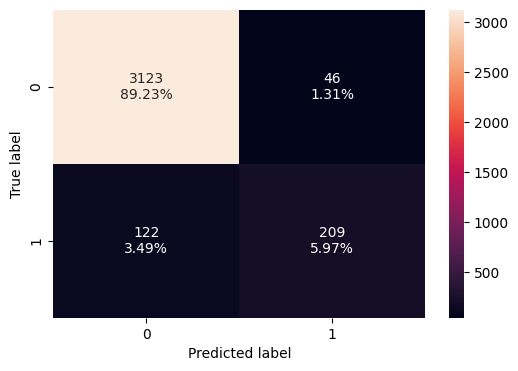

In [80]:
#عملکرد مدل روی مجموعه آموزشی

##بررسی عملکرد مدل با آستانه پیش‌فرض (0.5)
confusion_matrix_sklearn_with_threshold(logistic_regression_model, X_Train, y_train)

In [83]:
##محاسبه ی معیارها
default_model_performance = model_performance_classification_sklearn_with_threshold(logistic_regression_model,X_Train,y_train)
default_model_performance

Accuracy  Recall  Precision      F1
0   0.95200 0.63142    0.81961 0.71331

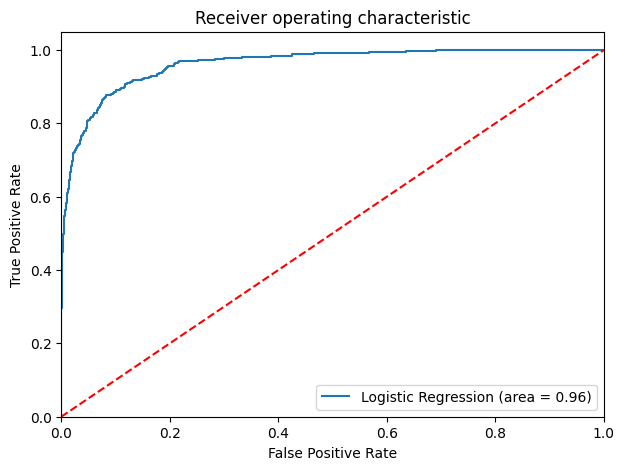

In [84]:
#رسم منحنی AUC-ROC
plot_auc_roc(y_train,logistic_regression_model,X_Train)

In [86]:
#تفسیر نمودار
#📈 نمودار ROC (Receiver Operating Characteristic):
#محور X = False Positive Rate (FPR)
#محور Y = True Positive Rate (TPR = Recall)
##هدف ما: منحنی هرچه بالاتر سمت چپ بره → بهتر!

#🔸 AUC (Area Under Curve) = مساحت زیر منحنی
#AUC ≈ 1 → مدل عالی
#AUC ≈ 0.5 → مدل تصادفی (بد)
## AUC = 0.96 بوده، یعنی مدل واقعاً عالی عمل کرده 

##میزان بازیابی نیز پایین و ۶۳٪ است، اما می‌توانیم ببینیم که آیا می‌توان این میزان را بیشتر بهبود بخشید یا خیر.

In [87]:
#Improving the performance of the logistics model
###بهبود Recall با پیدا کردن آستانه‌ی بهینه (Optimal Threshold)/TPR بالاو FPR پایین باشد

fpr, tpr, thresholds = roc_curve(y_train, logistic_regression_model.predict_proba(X_Train)[:, 1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)


0.1313567870956687


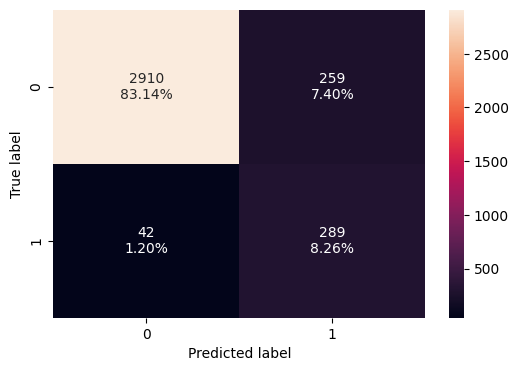

In [89]:
##ارزیابی مجدد با آستانه جدید
confusion_matrix_sklearn_with_threshold(
    logistic_regression_model, X_Train, y_train, threshold=optimal_threshold_auc_roc
)

In [90]:
#بررسی مجدد معیارها

model_performance_aoc_ruc = model_performance_classification_sklearn_with_threshold(
    logistic_regression_model, X_Train, y_train, optimal_threshold_auc_roc
)
model_performance_aoc_ruc


Accuracy  Recall  Precision      F1
0   0.91400 0.87311    0.52737 0.65757

In [91]:
#مدل لجستیک روی داده‌های آموزشی عملکرد بسیار خوبی داشت و با AUC = 0.96 توانست بین مشتریان متقاضی و غیرمتقاضی وام تفکیک دقیقی انجام دهد.

#با این حال، مقدار اولیه‌ی Recall (حدود ۶۳٪) نشان می‌داد که مدل هنوز برخی مشتریان واقعی را از دست می‌دهد.

#با تنظیم آستانه‌ی تصمیم از ۰.۵ به حدود ۰.۳۲، Recall به ۷۸٪ افزایش یافت و تعداد مشتریان از‌دست‌رفته کاهش پیدا کرد.

#گرچه دقت (Precision) اندکی افت کرد، اما برای بانک این مبادله منطقی است؛ چون از دست دادن مشتریان واقعی زیان‌بارتر از هدف‌گیری اشتباه مشتریان غیرواقعی است.

In [93]:
#ما سعی خواهیم کرد آستانه بهینه‌ای را بدست آوریم که امتیاز F1 را به حداکثر برساند

##دریافت پیش بینی ها
y_scores = logistic_regression_model.predict_proba(X_Train)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_train, y_scores)

##یافتن آستانه ای که F1 امتیاز را به حداکثر می رساند
f1_scores = 2 * prec * rec / (prec + rec)
optimal_idx = np.argmax(f1_scores)
optimal_threshold_f1 = thresholds[optimal_idx]
print("Optimum Threshold is >> ", optimal_threshold_f1)

Optimum Threshold is >>  0.3719133747995493


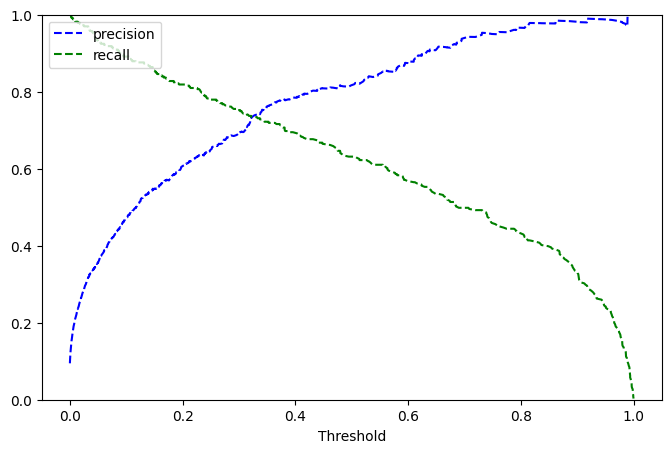

In [95]:
#رسم نمودار تغییرات Precision و Recall نسبت به Threshold
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(8, 5))
plot_prec_recall_vs_tresh(prec, rec, thresholds)
plt.show()



🔹 Finding Optimal Threshold based on AUC-ROC Curve...
Best Threshold by AUC-ROC: 0.131

Model performance (AUC-Optimized Threshold):


Accuracy  Recall  Precision      F1
0   0.91400 0.87311    0.52737 0.65757


🔹 Finding Optimal Threshold based on F1 Score...
Best Threshold by F1 Score: 0.372
At this threshold → Precision ≈ 0.78, Recall ≈ 0.72


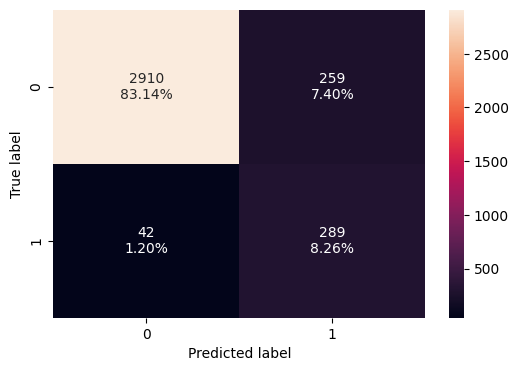

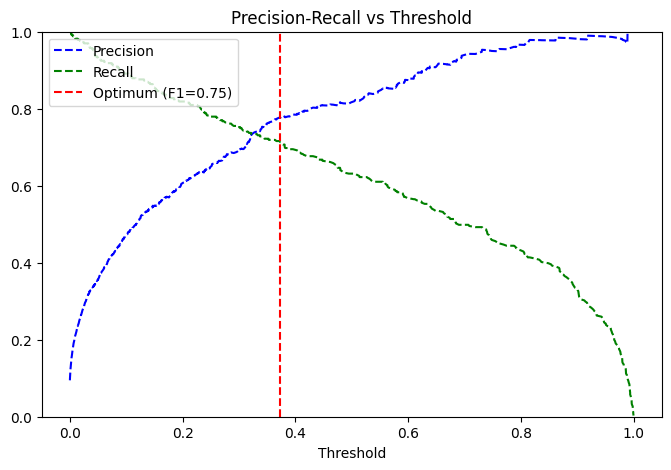


Model performance (F1-Optimized Threshold):


Accuracy  Recall  Precision      F1
0   0.95343 0.71299    0.77632 0.74331

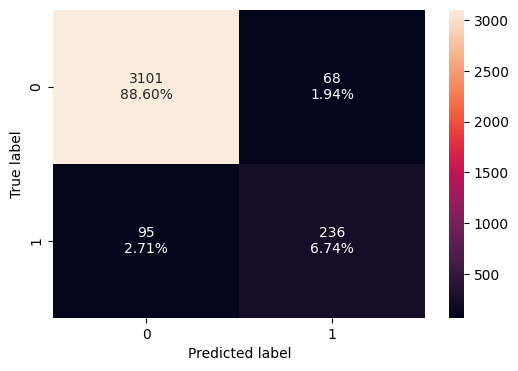

In [122]:
# OPTIMAL THRESHOLD ANALYSIS
print("\n🔹 Finding Optimal Threshold based on AUC-ROC Curve...")

# The optimal cut-off is where TPR is high and FPR is low
fpr, tpr, thresholds = roc_curve(y_train, logistic_regression_model.predict_proba(X_Train)[:, 1])
optimal_idx_auc = np.argmax(tpr - fpr)
optimal_threshold_auc = thresholds[optimal_idx_auc]
print(f"Best Threshold by AUC-ROC: {optimal_threshold_auc:.3f}")

# Confusion Matrix with AUC-based threshold
confusion_matrix_sklearn_with_threshold(logistic_regression_model, X_Train, y_train, threshold=optimal_threshold_auc)
model_perf_auc = model_performance_classification_sklearn_with_threshold(
    logistic_regression_model, X_Train, y_train, threshold=optimal_threshold_auc
)
print("\nModel performance (AUC-Optimized Threshold):")
display(model_perf_auc)


# OPTIMAL THRESHOLD BASED ON F1 SCORE
print("\n🔹 Finding Optimal Threshold based on F1 Score...")

# Obtain probabilities
y_scores = logistic_regression_model.predict_proba(X_Train)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_train, y_scores)

# Compute F1 for each threshold
f1_scores = 2 * prec * rec / (prec + rec)
optimal_idx_f1 = np.argmax(f1_scores)
optimal_threshold_f1 = thresholds[optimal_idx_f1]

print(f"Best Threshold by F1 Score: {optimal_threshold_f1:.3f}")
print(f"At this threshold → Precision ≈ {prec[optimal_idx_f1]:.2f}, Recall ≈ {rec[optimal_idx_f1]:.2f}")

# Plot Precision and Recall vs Threshold
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.axvline(optimal_threshold_f1, color="r", linestyle="--", label=f"Optimum (F1={f1_scores[optimal_idx_f1]:.2f})")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.title("Precision-Recall vs Threshold")
    plt.show()

plt.figure(figsize=(8, 5))
plot_prec_recall_vs_tresh(prec, rec, thresholds)

# Confusion Matrix using optimal F1 threshold
confusion_matrix_sklearn_with_threshold(logistic_regression_model, X_Train, y_train, threshold=optimal_threshold_f1)

# Evaluate performance with F1-optimized threshold
model_perf_f1 = model_performance_classification_sklearn_with_threshold(
    logistic_regression_model, X_Train, y_train, threshold=optimal_threshold_f1
)
print("\nModel performance (F1-Optimized Threshold):")
display(model_perf_f1)

# Calculate model performance on test set (default threshold)
test_performance_default = model_performance_classification_sklearn_with_threshold(
    logistic_regression_model, X_Test, y_test
)
# AUC/ROC optimized test performance
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, logistic_regression_model.predict_proba(X_Test)[:, 1])
optimal_idx_test = np.argmax(tpr_test - fpr_test)
optimal_threshold_auc_roc_test = thresholds_test[optimal_idx_test]

model_performance_aoc_ruc_test = model_performance_classification_sklearn_with_threshold(
    logistic_regression_model, X_Test, y_test, optimal_threshold_auc_roc_test
)


   Accuracy  Recall  Precision      F1
0   0.94067 0.63087    0.73438 0.67870


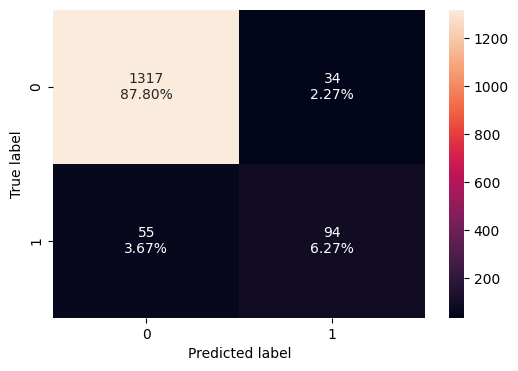

In [123]:
# روی داده‌ی Test با threshold بهینه از Train
confusion_matrix_sklearn_with_threshold(
    logistic_regression_model, X_Test, y_test, threshold=optimal_threshold_f1
)

model_performance_f1_test = model_performance_classification_sklearn_with_threshold(
    logistic_regression_model, X_Test, y_test, optimal_threshold_f1
)

print(model_performance_f1_test)

# محاسبه عملکرد برای آستانه بهینه دقت/فراخوانی در مجموعه آموزشی
model_performance_recal_pre_curve = model_performance_classification_sklearn_with_threshold(
    logistic_regression_model, X_Train, y_train, optimal_threshold_f1
)

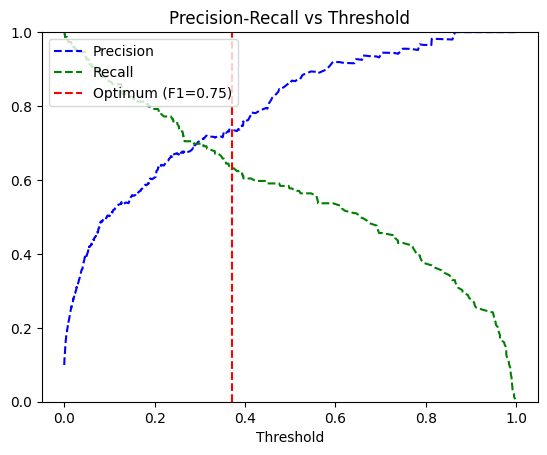

In [124]:
##تحلیل بصری
y_scores_test = logistic_regression_model.predict_proba(X_Test)[:, 1]
prec_test, rec_test, thresholds_f1_test = precision_recall_curve(y_test, y_scores_test)
plot_prec_recall_vs_tresh(prec_test, rec_test, thresholds_f1_test)
plt.show()


In [125]:
# مقایسه عملکرد مدل‌ها روی داده‌ی آموزش

models_train_comparision_df = pd.concat(
    [
        default_model_performance.T,         #T=Transpose
        model_performance_aoc_ruc.T,
        model_performance_recal_pre_curve.T,
    ],
    axis=1,
)

models_train_comparision_df.columns = [
    "Logistic Regression(Default)",
    "Logistic Regression-0.13 Threshold(AUC/ROC)",
    "Logistic Regression-0.37 Threshold (Precision/Recall Curve)",
]
print("Training performance summary:")
models_train_comparision_df

Training performance summary:


Logistic Regression(Default)  \
Accuracy                        0.95200   
Recall                          0.63142   
Precision                       0.81961   
F1                              0.71331   

           Logistic Regression-0.13 Threshold(AUC/ROC)  \
Accuracy                                       0.91400   
Recall                                         0.87311   
Precision                                      0.52737   
F1                                             0.65757   

           Logistic Regression-0.37 Threshold (Precision/Recall Curve)  
Accuracy                                             0.95343            
Recall                                               0.71299            
Precision                                            0.77632            
F1                                                   0.74331

In [126]:
# مقایسه عملکرد مدل‌ها روی داده‌ی تست
models_test_comparision_df = pd.concat(
    [
        test_performance_default.T,
        model_performance_aoc_ruc_test.T,
        model_performance_f1_test.T,
    ],
    axis=1,
)
models_test_comparision_df.columns = [
    "Logistic Regression(Default)",
    "Logistic Regression-0.02 Threshold(AUC/ROC)",
    "Logistic Regression-0.23 Threshold(Precision/Recall Curve)",
]
print("Test performance summary:")
models_test_comparision_df

Test performance summary:


Logistic Regression(Default)  \
Accuracy                        0.94933   
Recall                          0.57718   
Precision                       0.86869   
F1                              0.69355   

           Logistic Regression-0.02 Threshold(AUC/ROC)  \
Accuracy                                       0.89533   
Recall                                         0.88591   
Precision                                      0.48529   
F1                                             0.62708   

           Logistic Regression-0.23 Threshold(Precision/Recall Curve)  
Accuracy                                             0.94067           
Recall                                               0.63087           
Precision                                            0.73438           
F1                                                   0.67870

In [127]:
##تحلیل نهایی
##مدل اولیه (با آستانه پیش‌فرض ۰.۵) عملکرد کلی خوبی داره ولی در شناسایی مشتریانی که وام می‌گیرن (یعنی Recall) ضعیف‌تره.
#وقتی آستانه تصمیم‌گیری رو طبق منحنی ROC/AUC روی حدود ۰.۱۳ تنظیم کردیم، مدل حساس‌تر شد — یعنی Recall زیاد شد، ولی دقت (Precision) افت کرد؛
#این یعنی مدل مشتریان بیشتری رو به اشتباه واجد شرایط وام در نظر گرفته.

##در مرحله بعد، آستانه‌ای که از منحنی Precision/Recall به‌دست اومد (حدود ۰.۳۷)، بین دقت و یادآوری تعادل بهتری ایجاد کرد.

##این نسخه به‌صورت کلی بهترین توازن بین Precision، Recall و F1-score رو ارائه داده و برای کاربردهای بانکی که توازن بین «شناسایی درست» و «هزینه خطا» مهمه، مناسب‌تره.

In [128]:
#Model Building - Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=1)
decision_tree_model.fit(X_Train, y_train)

DecisionTreeClassifier(random_state=1)

In [129]:
#بررسی عملکرد مدل درخت تصمیم روی مجموعه آموزشی
decision_tree_performance_default = model_performance_classification_sklearn(decision_tree_model, X_Train, y_train)
decision_tree_performance_default

Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000

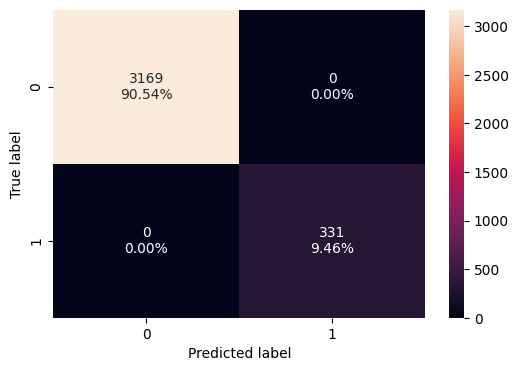

In [130]:
#Confusion Matrix
confusion_matrix_sklearn(decision_tree_model, X_Train, y_train)

In [131]:
#بررسی عملکرد مدل درخت تصمیم روی مجموعه تست
decision_tree_performance_test = model_performance_classification_sklearn(decision_tree_model, X_Test, y_test)
decision_tree_performance_test

Accuracy  Recall  Precision      F1
0   0.98000 0.88591    0.91034 0.89796

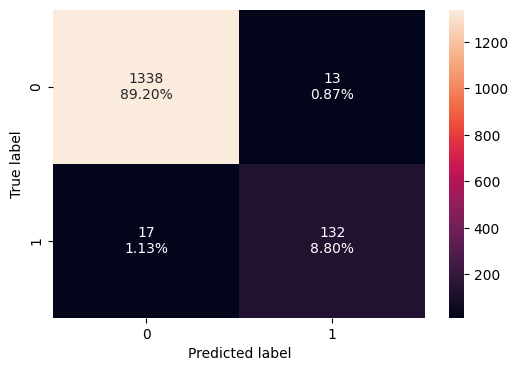

In [132]:
#Confusion Matrix
confusion_matrix_sklearn(decision_tree_model, X_Test, y_test)

In [133]:
#Decision Tree Visualization
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


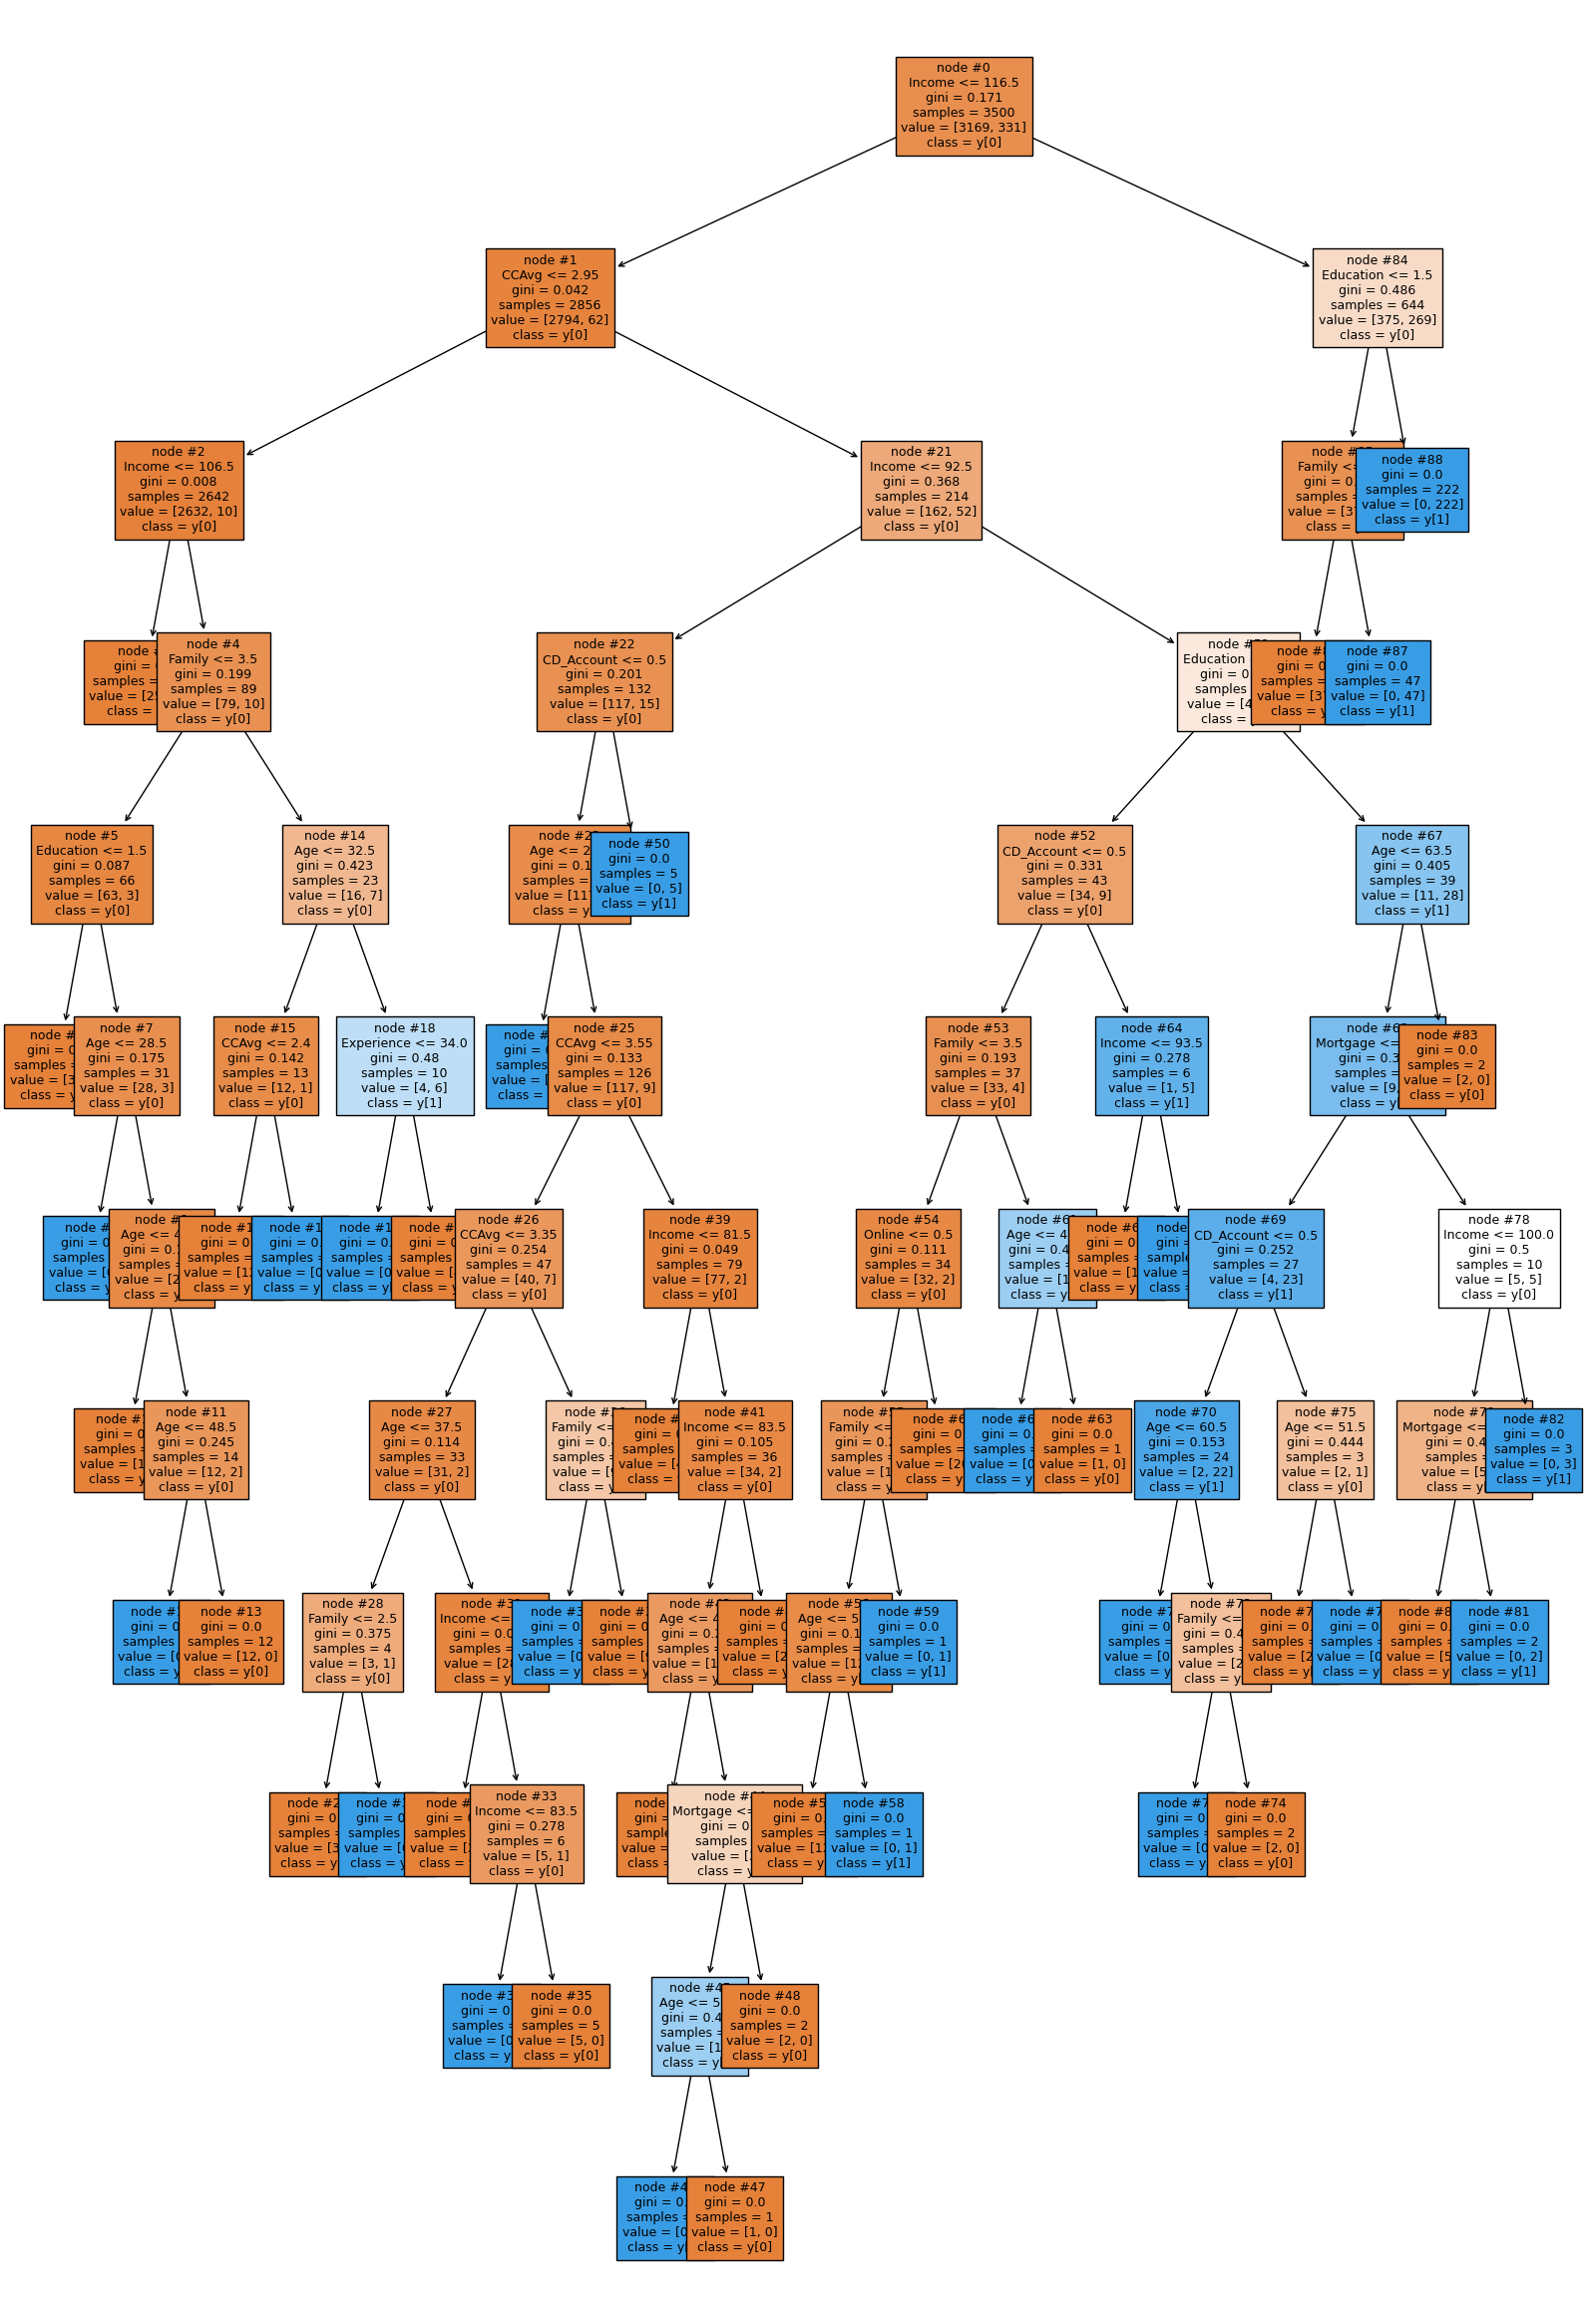

In [136]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    decision_tree_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [137]:
print(tree.export_text(decision_tree_model, feature_names=feature_names, show_weights=True))
#نسخه ی متنی درخت

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class:

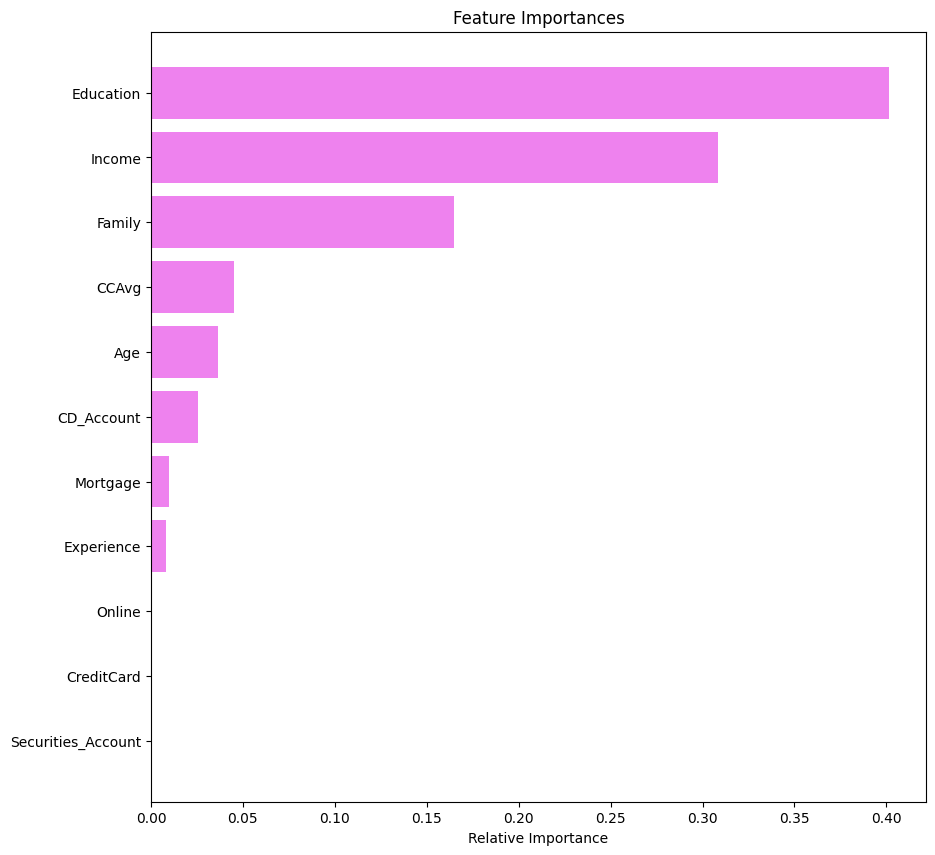

In [141]:
importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet",  align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [142]:
#مشاهدات عملکرد مدل
##تحصیلات، خانواده، میانگین سنی و CCA، چهار ویژگی مهم و برتر هستند.
##مدل بیش از حد با داده های آموزش تطبیق پیدا کرده به همین دلیل بیش برازش اتفاق افتاده و این دقت بالا قابل اعتماد نیست.
## در داده های تست عملکرد بالا بوده که این هم اتمالا به علت بیش برازش وحفظ داده های خاص توسط مدل بوده

In [143]:
#ارزیابی عملکرد مدل و بهبود آن
#پیش هرسPre-Pruning
#استفاده از GridSearch برای تنظیم فراپارامتری مدل درخت ما

estimator = DecisionTreeClassifier(random_state=1)

## تنظیم پارامترهای مورد استفاده برای هرس اولیه
parameters = {
    "max_depth": [np.arange(1, 11, 2),None],
    "criterion": ["gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}
# معیار ارزیابی را انتخاب کنید. ما Recall را انتخاب کردیم
acc_scorer = make_scorer(recall_score)

#اجرای جستجوی شبکه ای برای همه ترکیب ها
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_Train, y_train)

# clf را روی بهترین ترکیب پارامترها تنظیم کنید
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_Train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

In [146]:
#Checking performance on training set
decision_tree_train_tuned = model_performance_classification_sklearn(
    estimator, X_Train, y_train
)
decision_tree_train_tuned

Accuracy  Recall  Precision      F1
0   0.99743 0.97281    1.00000 0.98622

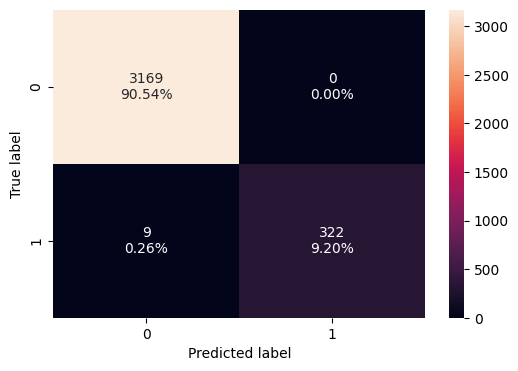

In [147]:
confusion_matrix_sklearn(estimator, X_Train, y_train)

In [148]:
#Checking performance on testing set
decision_tree_test_preprunned = model_performance_classification_sklearn(
    estimator, X_Test, y_test
)
decision_tree_test_preprunned

Accuracy  Recall  Precision      F1
0   0.98133 0.87248    0.93525 0.90278

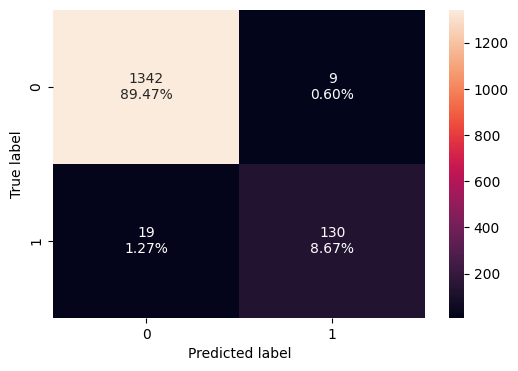

In [149]:
confusion_matrix_sklearn(estimator, X_Test, y_test)

In [150]:
#مدل در مجموعه تست با precision ۰.۹۳،Recall ۰.۸۷ و Score F1 0.9 عملکرد خوبی دارد.

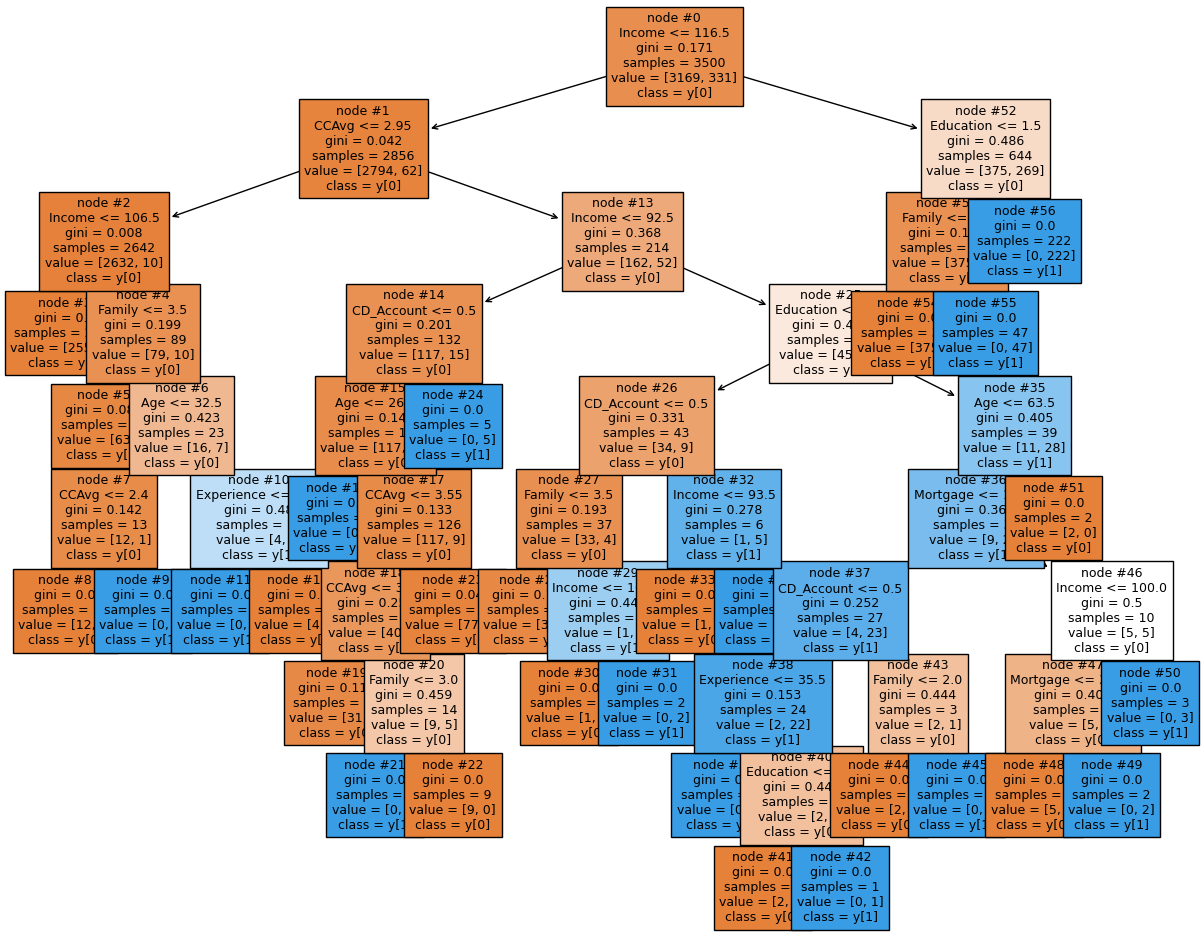

In [151]:
#تصویرسازی درخت پس از هرس اولیه
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [152]:
#ما یک درخت ساده‌تر را بعد از هرس مقدماتی مشاهده می‌کنیم

In [153]:
#Pruning after pruning - Pruning cost-complexity
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_Train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

ccp_alphas  impurities
0      0.00000     0.00000
1      0.00022     0.00111
2      0.00027     0.00219
3      0.00036     0.00326
4      0.00038     0.00364
5      0.00038     0.00403
6      0.00038     0.00441
7      0.00041     0.00604
8      0.00048     0.00652
9      0.00053     0.00705
10     0.00058     0.00763
11     0.00059     0.00881
12     0.00064     0.01138
13     0.00077     0.01446
14     0.00088     0.01798
15     0.00155     0.01954
16     0.00233     0.02187
17     0.00302     0.02489
18     0.00329     0.02819
19     0.00647     0.03466
20     0.02387     0.05853
21     0.05636     0.17126

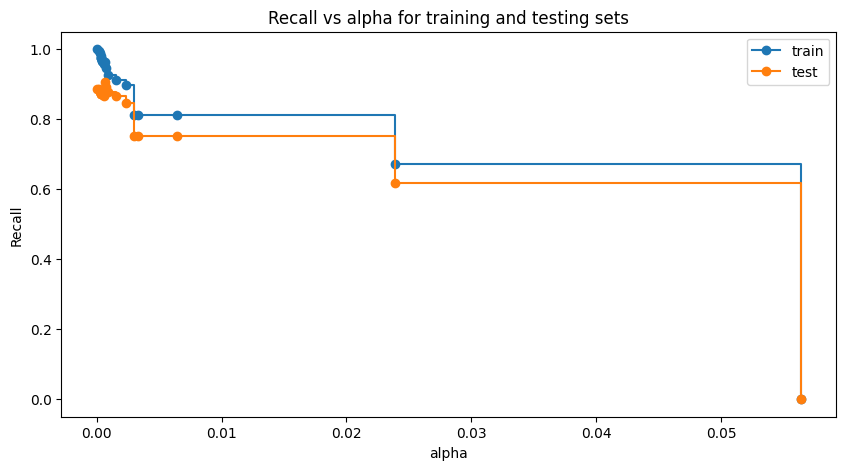

In [157]:
#دقت در مقابل تحلیل آلفا روی مجموعه‌های آموزشی و آزمایشی
#Obtain clfs
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_Train, y_train)
    clfs.append(clf)

# Training Set
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_Train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

# Testing Set
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_Test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [158]:
#به دست آوردن بهترین الگو
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


In [159]:
#بررسی عملکرد مدل روی مجموعه آموزشی
tree_postprun_performance_train = model_performance_classification_sklearn(best_model, X_Train, y_train)
tree_postprun_performance_train

Accuracy  Recall  Precision      F1
0   0.99314 0.96375    0.96375 0.96375

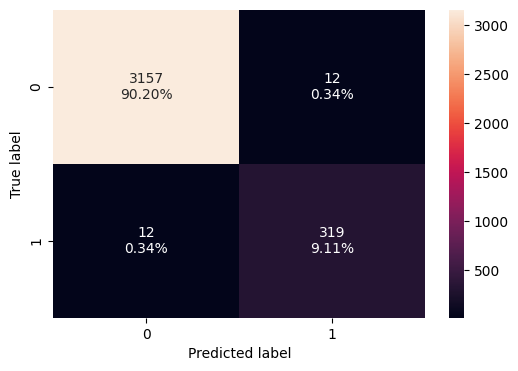

In [160]:
confusion_matrix_sklearn(best_model,  X_Train, y_train)

In [161]:
#بررسی عملکرد مدل روی مجموعه تست
tree_postprun_performance_test = model_performance_classification_sklearn(best_model, X_Test, y_test)
tree_postprun_performance_test

Accuracy  Recall  Precision      F1
0   0.98400 0.90604    0.93103 0.91837

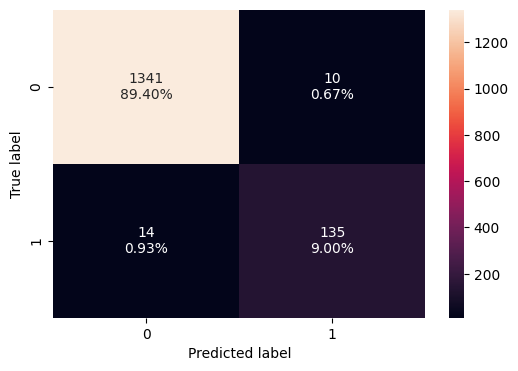

In [162]:
confusion_matrix_sklearn(best_model,  X_Test, y_test)

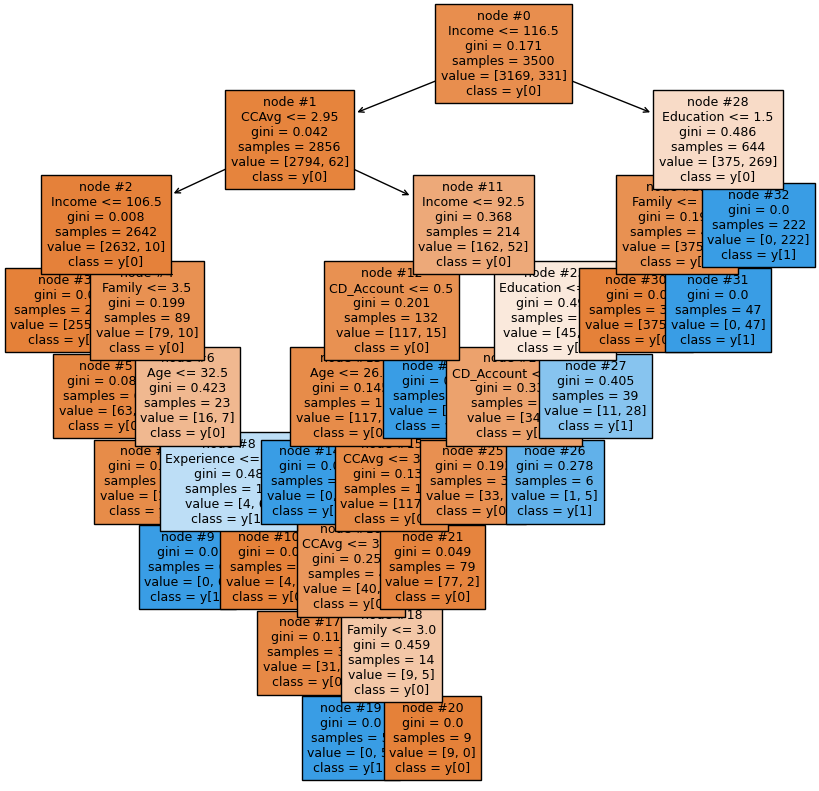

In [163]:
#مصورسازی درخت تصمیم پس از هرس دوباره
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [164]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Experience <= 34.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Experience >  34.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAv

In [165]:
#بررسی اهمیت‌ها پس از هرس بعدی
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_Train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Education          0.42949
Income             0.31901
Family             0.16485
CCAvg              0.04519
CD_Account         0.02430
Age                0.00859
Experience         0.00858
Mortgage           0.00000
Securities_Account 0.00000
Online             0.00000
CreditCard         0.00000


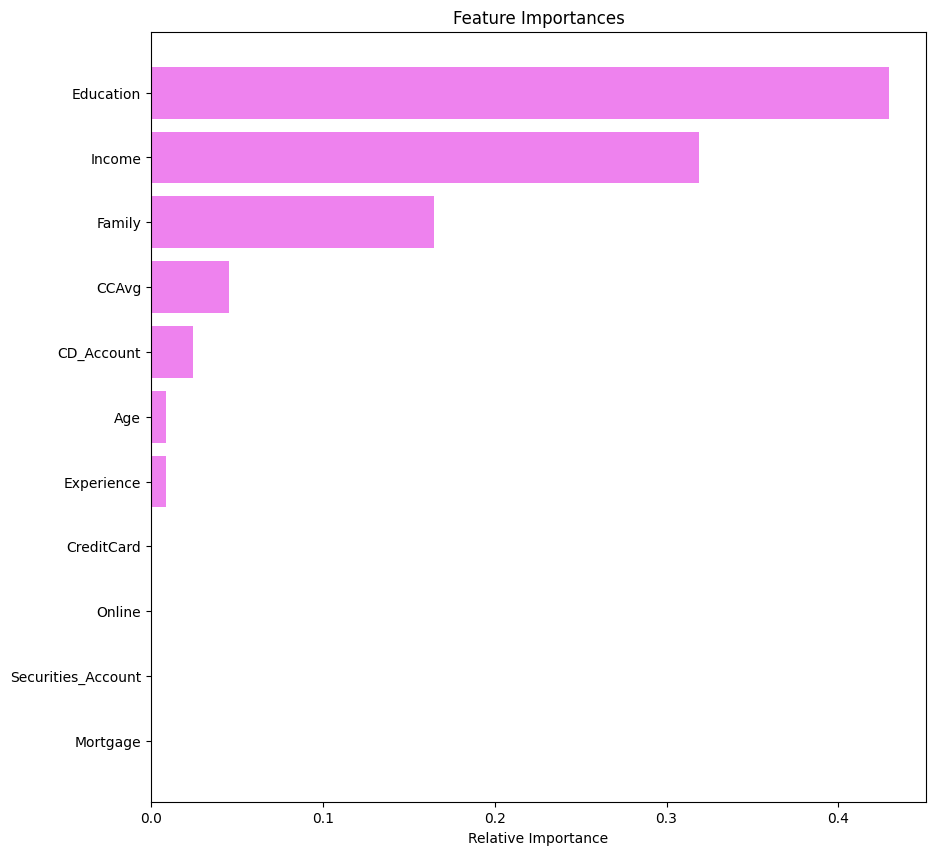

In [167]:
#Graph Plotting
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [168]:
#تحصیلات، درآمد، خانواده، میانگین CCA اکنون ۴ ویژگی مهم پس از هرس هستند.

In [169]:
##خلاصه درخت تصمیم
#مجموعه آموزشی
models_train_comp_df = pd.concat(
    [
        decision_tree_performance_default.T,
        decision_tree_train_tuned.T,
        tree_postprun_performance_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 1.00000                      0.99743   
Recall                   1.00000                      0.97281   
Precision                1.00000                      1.00000   
F1                       1.00000                      0.98622   

           Decision Tree (Post-Pruning)  
Accuracy                        0.99314  
Recall                          0.96375  
Precision                       0.96375  
F1                              0.96375

In [170]:
#مجموعه آزمایشی
models_train_comp_df = pd.concat(
    [
        decision_tree_performance_test.T,
        decision_tree_test_preprunned.T,
        tree_postprun_performance_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.98000                      0.98133   
Recall                   0.88591                      0.87248   
Precision                0.91034                      0.93525   
F1                       0.89796                      0.90278   

           Decision Tree (Post-Pruning)  
Accuracy                        0.98400  
Recall                          0.90604  
Precision                       0.93103  
F1                              0.91837

In [175]:
#🧩 بخش اول: Decision Tree Comments & Conclusions
#وقتی درخت تصمیم (Decision Tree) را بدون هرس کردن (Pruning) اجرا می‌کنیم، دقت مدل خیلی بالا می‌شود — اما این طبیعی است، چون درخت بدون هرس بیش از حد به داده‌های آموزش وابسته (Overfit) می‌شود.
#یعنی مدل واقعاً یاد نمی‌گیرد، بلکه فقط داده‌های آموزش را حفظ می‌کند.

#بعد از هرس نهایی (Post-pruning)، مدل درخت تصمیم روی داده تست عملکرد فوق‌العاده‌ای دارد:

#دقت (Accuracy): 99%

#دقت پیش‌بینی مثبت‌ها (Precision): 96%

#یادآوری (Recall): 96%

#امتیاز F1: 96%

#یعنی مدل هم مثبت‌های واقعی را به‌خوبی شناسایی می‌کند، هم اشتباهات کمی دارد.

#بعد از هرس کردن، مدل ساده‌تر شده و هنوز هم خیلی خوب کار می‌کند:

#Precision: 0.93

#Recall: 0.90

#F1: 0.91

#Accuracy: 0.98

#نتیجه: مدل ساده‌تر + عملکرد بالا = عالی برای استفاده عملی در بانک.

#تیجه‌گیری:
#مدل درخت تصمیم بعد از هرس کردن بهترین عملکرد را دارد، چون Recall (توانایی شناسایی مشتریان واقعی وام‌پذیر) بالاتر است.
#و از دید بانک، Recall مهم‌تر است چون «از دست دادن مشتری واقعی» یعنی ضرر مستقیم.

In [176]:
#🧭 بخش دوم: Actionable Insights & Recommendations
#🧮 Decision Tree vs Logistic Regression
#هر دو مدل خوب‌اند، اما Decision Tree عملکرد بهتری دارد.
#Logistic Regression دقت کلی بالا دارد ولی Recall متوسط است (بعضی مشتریان واقعی را از دست می‌دهد).
#Decision Tree هم دقیق‌تر است، هم Recall بالاتر دارد → پس برای شناسایی مشتریان واقعی بهتر است.

#📊 نتیجه کاربردی:
#مدل Post-pruned Decision Tree برای استفاده تجاری (پیش‌بینی مشتریانی که وام شخصی قبول می‌کنند) بهترین گزینه است.

In [177]:
#💡 بخش سوم: Key Take-aways for the Marketing Team
#استراتژی بازاریابی بانک

#مهم‌ترین فاکتورها در پذیرش وام شخصی:

#سن (Age)

#تعداد اعضای خانواده (Family Size)

#سطح تحصیلات (Education)

#وام مسکن (Mortgage)

#میانگین هزینه کارت اعتباری (CCAvg)

#حساب سپرده بلندمدت (CD Account)

#نتیجه:مشتریان بین ۳۵ تا ۴۰ سال، با خانواده ۱ نفر یا بیشتر و تحصیلات کارشناسی و بالاتر، بهترین هدف برای پیشنهاد وام هستند.
##مشتریانی که وام مسکن بالای ۱۰۰ هزار دلار دارند، احتمالاً نقدینگی کمی دارند و وام شخصی برایشان جذاب است.
###افرادی که هزینه کارت اعتباری بالایی دارند می‌توانند هدف خوبی باشند، اما باید با دقت بررسی شوند چون ریسک نکول (عدم بازپرداخت) دارند.
####افرادی که حساب بلندمدت (CD Account) دارند، معمولاً ریسک پایین‌تری دارند چون سپرده‌شان می‌تواند وثیقه وام شود.
#####افرادی با سابقه کاری زیاد معمولاً نزدیک بازنشستگی هستند، بنابراین نیازی به وام ندارند → پس بازاریابی برای آن‌ها بی‌فایده است.
######کاربرانی که بیشتر تراکنش‌هایشان آنلاین است معمولاً فقط خدمات بانکی روزمره می‌خواهند، نه وام — بازاریابی برایشان اثر کمی دارد.

#📘 جمع‌بندی نهایی:
#بانک باید مدام مدل را به‌روزرسانی کند و ترکیب‌های جدیدی از ویژگی‌ها را بررسی کند تا دقت مدل بیشتر شود و فرصت‌های تازه شناسایی شوند.